# Renewable Energy Project Opportunities in the Texas Permian Basin
## - Supervised Learning: Linear Regression Analysis Workbook
(A Capstone Project for AI ML Certificate Course (July 2025) - Muhammad Zafar

![text](images/project_header_image.png)

Research Question (Primary)
---------------------------
#### Which counties in the Permian Basin in the state of Texas are best suited for investment in renewable energy projects and why? What type of projects are suitable to develop in those areas? 

Secondary Question:
-------------------
#### Using the socio-economic data of the Permian Basin identify top factors that contribute to the lack of internet access for workers in a given county. How may this impact the decision to invest in a renewable energy project in that county?
<br>
<br>


Note
----
#### For Exploratory Data Analysis (EDA) on the dataset please see the notebook:  
**ses_data_permian_counties_regression.ipynb**
<br>
<br>

Overview 
--------
Renewable energy projects, like wind and solar, offer plenty of investment opportunities in the emerging market for net-zero carbon world. The transition to clean energy is essential to meet the Paris Climate Agreement's goal of reduced carbon emissions by 2030. Eventual goal is to get to net-zero carbon by 2050. This requires major shifts in energy use patterns from hydrocarbon-based resources (oil, natural gas, coal) to renewable energy sources, primarily land-based wind, off-shore wind and solar energy sources. There are also battery energy sources (BESS) as well as distributed wind and solar rooftop commercial and residential opportunities.

This project will explore investment opportunities for renewable energy projects in the Permian Basin area in Texas, USA.

Internet access is critical for long-term viability of deploying renewable energy projects in an area. Internet access allows the local population to learn and develop knowledge and skills for jobs in the renewable industry and also to keep updating skills as the industry develops. To attract new and younger workers to the area, good internet access is normally deemed necessary for investment in renewable energy projects. Lack of internet access can be a negative factor for investment since it impedes worker learning and development.

Data Sources
-------------
The National Renewable Energy Lab (NREL) (https://www.nrel.gov/) is one of the premiere U.S. government research labs that shares information on the use and deployment of renewable energy technologies and projects in the U.S. The NREL Permian Energy Development Lab (PEDL) published a data set for socioeconomic (including energy production) data for all the counties in the Permian Basin in Texas and New Mexico.

The dataset are organized into four categories: Socioeconomics, Health & Wellbeing, Jobs & Workforce, and Energy Infrastructure & Potential.  
Each category contains multiple data elements the details of those are provided in a separate file: [nrel_ses_permian_basin_counties_metadata.txt](data/nrel_ses_permian_basin_counties_metadata.txt)


**About Socioeconomic data for Permian Basin (U.S. Texas):**  
This dataset was compiled to support socioeconomic analyses of counties in the Permian Basin in Texas and New Mexico for the Permian Energy Development Lab (PEDL). The metrics in the dataset are organized into four categories: Socioeconomics, Health & Wellbeing, Jobs & Workforce, and Energy Infrastructure & Potential. The metrics originated from previously published datasets, including SLOPE, LEAD, Rural Atlas, EJScreen, and Census data.
USE: this dataset can be used to understand the socio-economic status of the people in the Permian basin and their use of technology and related tools.

**Reference:**  
Socioeconomic Data for the Permian Basin | NREL Data Catalog  
Ross, Liz. 2024. "Socioeconomic Data for the Permian Basin." NREL Data Catalog. Golden, CO: National Renewable Energy Laboratory. Last updated: January 16, 2025. Available at https://www.nrel.gov.

Federal Reserve Bank of Dallas. Permian Basin Energy Resources Background. Available at https://www.dallasfed.org/research/energy11/permian.
<br>

Methodology
------------
1) Use **Exploratory Data Analysis** to determine which counties offer best opportunities to invest in renewable energy projects and type of project

2) Build correlation matrix and pair-plots to understand relationships between input variables

3) **Supervised learning methods:** \
    a) Using linear regression to build a model that can explain what factors determine internet access in a county in the Permian basin 
    
       Dependent variable: NoInternet_PctTractsOver75thPctile
       Independent variables: socio-economic variables in the dataset  (selected columns)
<br>  

    b) Use Ridge regression and model pipeline method to improve model accuracy from step 3. Draw out MSE vs 1/alpha curves for training and development MSEs to find the optimum model parameters without over-fitting. 
    
    c) Use Lasso regression to select significant features (columns) in the dataset.

    d) Use Ridge regression with selected columns identified by Lasso.
    
    e) Compare results for all models
<br>
Note: For linear regression analysis we use the entire dataset for the U.S. Permian Basin (Texas and New Mexico counties) to understand the relationship of NoInternet_PctTractsOver75thPctile to the socio-eceonomic factors in the region.  
<br>


## Data Understanding - Correlation Analysis
First understand the Permian Basin socio-economic dataset:
  - See notebook ses_data_permian_counties_analysis.ipynb for EDA
<br>

In [2167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2169]:
data = pd.read_csv('data/ses_data_all_tx_nm_counties_2024.csv')
data.info(150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 142 columns):
 #    Column                                           Dtype  
---   ------                                           -----  
 0    CountyFIPS                                       int64  
 1    State                                            object 
 2    County                                           object 
 3    PopulationSize                                   int64  
 4    PopulationChangeRate_2010_2020                   float64
 5    PopulationChangeRate_2020_2021                   float64
 6    GDP_2021_thousands                               int64  
 7    GDP_staterank2021                                int64  
 8    GDP_pctchange_2020_2021                          float64
 9    GDP_pctchange_staterank2021                      int64  
 10   DAC_StatusYES_NumTracts                          int64  
 11   DAC_StatusYES_PctTracts                          float64
 12   SVI_Ov

In [2171]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
data.head(10)

CountyFIPS State             County  PopulationSize  \
0       35001    NM  Bernalillo County          674393   
1       35003    NM      Catron County            3731   
2       35005    NM      Chaves County           64629   
3       35006    NM      Cibola County           27184   
4       35007    NM      Colfax County           12369   
5       35009    NM       Curry County           47999   
6       35011    NM     De Baca County            1680   
7       35013    NM    Dona Ana County          221508   
8       35015    NM        Eddy County           60911   
9       35017    NM       Grant County           27889   

   PopulationChangeRate_2010_2020  PopulationChangeRate_2020_2021  \
0                        2.094892                       -0.323391   
1                       -3.919463                        3.294574   
2                       -0.743392                       -0.827093   
3                       -0.150663                        0.398877   
4                       -9.912727                        0.300032   
5                        0.111626                       -0.674599   
6                      -16.023739                        0.119190   
7                        4.936124                        0.731700   
8                       15.762879                       -2.162006   
9                       -4.502948                       -1.134390   

   GDP_2021_thousands  GDP_staterank2021  GDP_pctchange_2020_2021  \
0            35421924                  1                      4.9   
1               85856                 31                      1.2   
2             1887351                 12                     -3.1   
3              559748                 20                     -4.2   
4              426659                 24                      0.2   
5             2892180                  8                      1.4   
6               79599                 32                     -5.8   
7             6847115                  3                      3.0   
8             7359252                  2                    -12.0   
9              957071                 15                     -0.6   

   GDP_pctchange_staterank2021  DAC_StatusYES_NumTracts  \
0                            7                       53   
1                           16                        1   
2                           24                       13   
3                           27                        7   
4                           19                        3   
5                           15                        4   
6                           29                        1   
7                           10                       27   
8                           31                        6   
9                           21                        6   

   DAC_StatusYES_PctTracts  SVI_OverallRanking  SVI_Socioeconomic  \
0                     34.6              0.7785             0.6805   
1                    100.0              0.4548             0.4411   
2                     81.2              0.9516             0.8466   
3                    100.0              0.9815             0.8358   
4                    100.0              0.9306             0.7199   
5                     33.3              0.9281             0.9523   
6                    100.0              0.5891             0.7782   
7                     65.9              0.9898             0.9723   
8                     50.0              0.6935             0.4589   
9                     75.0              0.9004             0.7339   

   SVI_HouseholdCharacteristics  SVI_MinorityStatus  \
0                        0.6814              0.9370   
1                        0.7126              0.5083   
2                        0.9780              0.9354   
3                        0.9761              0.9828   
4                        0.9223              0.8902   
5                        0.9609              0.8892   
6                        0.2447              0.96

In [2173]:
missing_vals = data.isnull().sum()
display(missing_vals)

# Get columns with null values
columns_with_nulls = data.columns[data.isnull().any()]
display(columns_with_nulls)

CountyFIPS                          0
State                               0
County                              0
PopulationSize                      0
PopulationChangeRate_2010_2020      0
                                   ..
ResidentialPV_TechPotential         0
CommercialPV_TechPotential          0
LandbasedWind_TechPotential         0
DistributedWind_TechPotential       0
GeothermalHeatPump_EconPotential    0
Length: 142, dtype: int64

Index(['MedianHHInc', 'Cancer_PctTractsOver75thPctile',
       'Respiratory_PctTractsOver75thPctile',
       'DieselPM_PctTractsOver75thPctile', 'PM25_PctTractsOver75thPctile',
       'Ozone_PctTractsOver75thPctile', 'UST_PctTractsOver75thPctile',
       'Wastewater_PctTractsOver75thPctile',
       'ClimateLifeLoss_PctTractsOver75thPctile',
       'FoodDesert_PctTractsOver75thPctile', 'Oil_BBL_2022',
       'Oil_Condensate_BBL_2022_TX', 'Gas_Casinghead_MCF_2022_TX',
       'Gas_GW_MCF_2022_TX', 'Gas_MCF_2022_NM'],
      dtype='object')

In [2175]:
col_names = ['TribeName', 'TribeAcres', 'MedianHHInc',
       'Cancer_PctTractsOver75thPctile', 'Respiratory_PctTractsOver75thPctile',
       'DieselPM_PctTractsOver75thPctile',
       'Wastewater_PctTractsOver75thPctile',
       'FoodDesert_PctTractsOver75thPctile', 'Oil_BBL_2022',
       'Oil_Condensate_BBL_2022_TX', 'Gas_Casinghead_MCF_2022_TX',
       'Gas_GW_MCF_2022_TX', 'Gas_MCF_2022_NM']

selected_columns = data.filter(items=col_names)
#selected_columns.info()

# get missing val count
missing_vals = selected_columns.isnull().sum()
display(missing_vals)

MedianHHInc                              1
Cancer_PctTractsOver75thPctile          25
Respiratory_PctTractsOver75thPctile     25
DieselPM_PctTractsOver75thPctile        25
Wastewater_PctTractsOver75thPctile     164
FoodDesert_PctTractsOver75thPctile      25
Oil_BBL_2022                            50
Oil_Condensate_BBL_2022_TX              56
Gas_Casinghead_MCF_2022_TX              56
Gas_GW_MCF_2022_TX                      56
Gas_MCF_2022_NM                        281
dtype: int64

In [2177]:
# NA, NR values
na_data = data.isna().sum()
na_data

CountyFIPS                          0
State                               0
County                              0
PopulationSize                      0
PopulationChangeRate_2010_2020      0
                                   ..
ResidentialPV_TechPotential         0
CommercialPV_TechPotential          0
LandbasedWind_TechPotential         0
DistributedWind_TechPotential       0
GeothermalHeatPump_EconPotential    0
Length: 142, dtype: int64

In [2179]:
# fill in missing data for columns where it makes sense (and needed by the analysis)
# make a copy of the original data
data_clean = data
# drop columns that have no meaning (ID type) or non-numeric (State, County)
data_clean.drop(['CountyFIPS', 'County', 'State'], axis=1, inplace=True)

mean_val = data['MedianHHInc'].mean()
display(mean_val)
data_clean['MedianHHInc'] = data['MedianHHInc'].fillna(mean_val)


56148.74125874126

In [2181]:
data_clean.columns.tolist()

['PopulationSize',
 'PopulationChangeRate_2010_2020',
 'PopulationChangeRate_2020_2021',
 'GDP_2021_thousands',
 'GDP_staterank2021',
 'GDP_pctchange_2020_2021',
 'GDP_pctchange_staterank2021',
 'DAC_StatusYES_NumTracts',
 'DAC_StatusYES_PctTracts',
 'SVI_OverallRanking',
 'SVI_Socioeconomic',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'SVI_HousingTransportation',
 'PctAge65andOlder',
 'PctUnderAge18',
 'PctBlackNonHispanic',
 'PctHispanic',
 'PctNativeAmerican',
 'PctWhiteNonHispanic',
 'PctMultipleRace',
 'PctLimitedEnglishSpeaking',
 'PctForeignBorn',
 'PctLessThanHS',
 'PctHSDiplomaOnly',
 'PctSomeCollege',
 'PctAssocDegree',
 'PctCollegePlus',
 'MedianHHInc',
 'PovertyRate',
 'EnergyBurden',
 'UnemploymentRate',
 'Literacy_AvgScore',
 'Literacy_PctLevel1',
 'Literacy_PctLevel2',
 'Literacy_PctLevel3',
 'Numeracy_AvgScore',
 'Numeracy_PctLevel1',
 'Numeracy_PctLevel2',
 'Numeracy_PctLevel3',
 'HealthRank_HealthOutcomes',
 'HealthRank_LengthOfLife',
 'HealthRank_Qualit

## Calculate & Plot Correlation Matrix across Variables

In [2184]:
corr_matrix1 = data_clean.select_dtypes(include=['number', 'float']).corr()
display(corr_matrix1)

PopulationSize  \
PopulationSize                          1.000000   
PopulationChangeRate_2010_2020          0.327291   
PopulationChangeRate_2020_2021          0.060751   
GDP_2021_thousands                      0.959380   
GDP_staterank2021                      -0.328684   
...                                          ...   
ResidentialPV_TechPotential             0.993212   
CommercialPV_TechPotential              0.967724   
LandbasedWind_TechPotential            -0.142448   
DistributedWind_TechPotential           0.550233   
GeothermalHeatPump_EconPotential        0.883874   

                                  PopulationChangeRate_2010_2020  \
PopulationSize                                          0.327291   
PopulationChangeRate_2010_2020                          1.000000   
PopulationChangeRate_2020_2021                          0.516684   
GDP_2021_thousands                                      0.240590   
GDP_staterank2021                                      -0.531094   
...                                                          ...   
ResidentialPV_TechPotential                             0.330626   
CommercialPV_TechPotential                              0.328229   
LandbasedWind_TechPotential                            -0.267701   
DistributedWind_TechPotential                           0.444226   
GeothermalHeatPump_EconPotential                        0.250830   

                                  PopulationChangeRate_2020_2021  \
PopulationSize                                          0.060751   
PopulationChangeRate_2010_2020                          0.516684   
PopulationChangeRate_2020_2021                          1.000000   
GDP_2021_thousands                                     -0.013275   
GDP_staterank2021                                      -0.017670   
...                                                          ...   
ResidentialPV_TechPotential                             0.059571   
CommercialPV_TechPotential                              0.055362   
LandbasedWind_TechPotential                            -0.209123   
DistributedWind_TechPotential                           0.319218   
GeothermalHeatPump_EconPotential                        0.001194   

                                  GDP_2021_thousands  GDP_staterank2021  \
PopulationSize                              0.959380          -0.328684   
PopulationChangeRate_2010_2020              0.240590          -0.531094   
PopulationChangeRate_2020_2021             -0.013275          -0.017670   
GDP_2021_thousands                          1.000000          -0.278033   
GDP_staterank2021                          -0.278033           1.000000   
...                                              ...                ...   
ResidentialPV_TechPotential                 0.930566          -0.340767   
CommercialPV_TechPotential                  0.933059          -0.333538   
LandbasedWind_TechPotential                -0.122233          -0.110370   
DistributedWind_TechPotential               0.476109          -0.435826   
GeothermalHeatPump_EconPotential            0.857641          -0.365791   

                                  GDP_pctchange_2020_2021  \
PopulationSize                                   0.101727   
PopulationChangeRate_2010_2020                   0.152417   
PopulationChangeRate_2020_2021                   0.327199   
GDP_2021_thousands                               0.063502   
GDP_staterank2021                                0.075618   
...                                                   ...   
ResidentialPV_TechPotential                      0.103710   
CommercialPV_TechPotential                       0.096409   
LandbasedWind_TechPotential                     -0.098198   
DistributedWind_TechPotential                    0.190833   
GeothermalHeatPump_EconPotential                 0.096078   

                                  GDP_pctchange_staterank2021  \
PopulationSize                                      -0.144246   
PopulationC

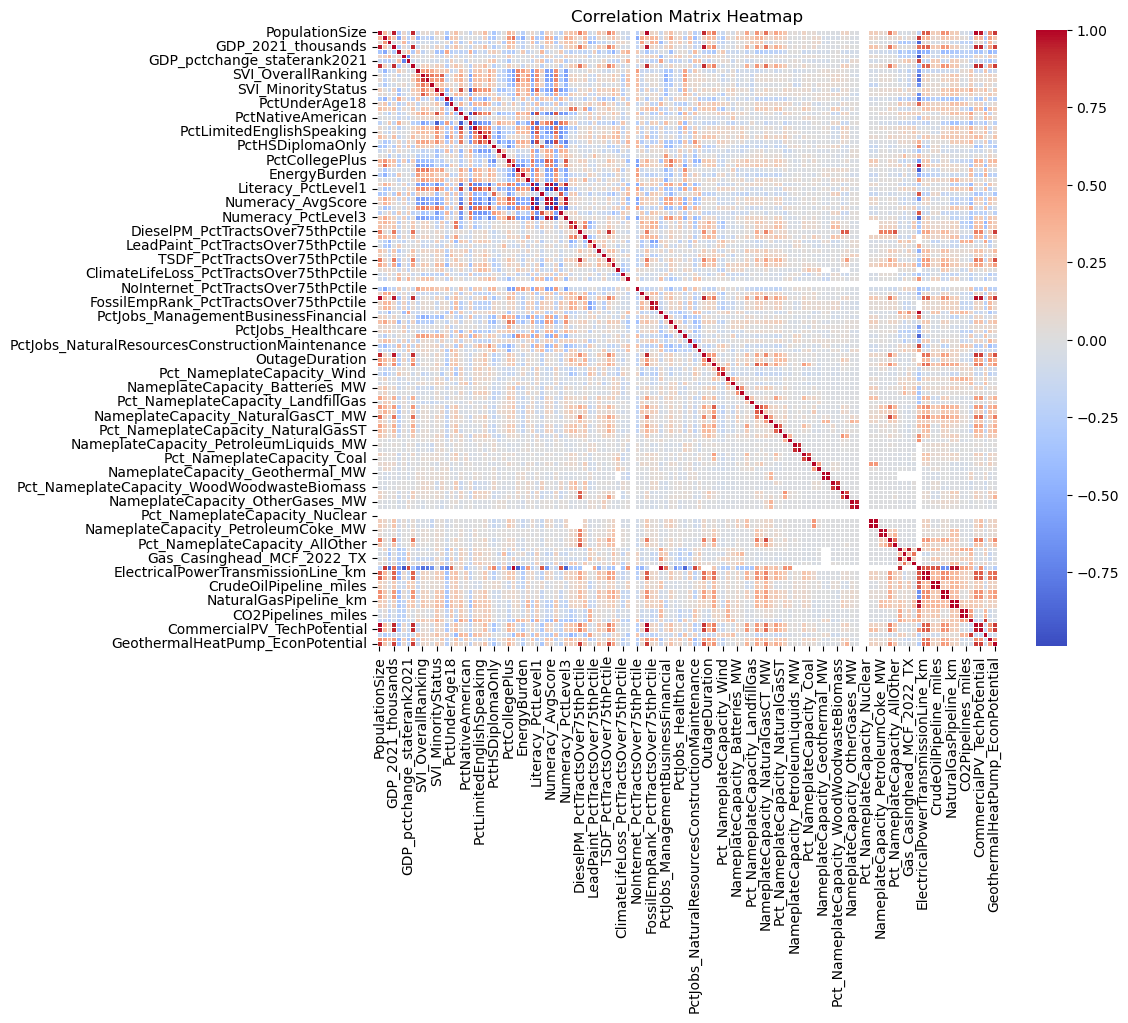

In [2186]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) # Optional: Adjust figure size for better readability
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
sns.heatmap(corr_matrix1, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [2188]:
corr_matrix2 = data_clean.select_dtypes(exclude='object').corr()
display(corr_matrix2)

PopulationSize  \
PopulationSize                          1.000000   
PopulationChangeRate_2010_2020          0.327291   
PopulationChangeRate_2020_2021          0.060751   
GDP_2021_thousands                      0.959380   
GDP_staterank2021                      -0.328684   
...                                          ...   
ResidentialPV_TechPotential             0.993212   
CommercialPV_TechPotential              0.967724   
LandbasedWind_TechPotential            -0.142448   
DistributedWind_TechPotential           0.550233   
GeothermalHeatPump_EconPotential        0.883874   

                                  PopulationChangeRate_2010_2020  \
PopulationSize                                          0.327291   
PopulationChangeRate_2010_2020                          1.000000   
PopulationChangeRate_2020_2021                          0.516684   
GDP_2021_thousands                                      0.240590   
GDP_staterank2021                                      -0.531094   
...                                                          ...   
ResidentialPV_TechPotential                             0.330626   
CommercialPV_TechPotential                              0.328229   
LandbasedWind_TechPotential                            -0.267701   
DistributedWind_TechPotential                           0.444226   
GeothermalHeatPump_EconPotential                        0.250830   

                                  PopulationChangeRate_2020_2021  \
PopulationSize                                          0.060751   
PopulationChangeRate_2010_2020                          0.516684   
PopulationChangeRate_2020_2021                          1.000000   
GDP_2021_thousands                                     -0.013275   
GDP_staterank2021                                      -0.017670   
...                                                          ...   
ResidentialPV_TechPotential                             0.059571   
CommercialPV_TechPotential                              0.055362   
LandbasedWind_TechPotential                            -0.209123   
DistributedWind_TechPotential                           0.319218   
GeothermalHeatPump_EconPotential                        0.001194   

                                  GDP_2021_thousands  GDP_staterank2021  \
PopulationSize                              0.959380          -0.328684   
PopulationChangeRate_2010_2020              0.240590          -0.531094   
PopulationChangeRate_2020_2021             -0.013275          -0.017670   
GDP_2021_thousands                          1.000000          -0.278033   
GDP_staterank2021                          -0.278033           1.000000   
...                                              ...                ...   
ResidentialPV_TechPotential                 0.930566          -0.340767   
CommercialPV_TechPotential                  0.933059          -0.333538   
LandbasedWind_TechPotential                -0.122233          -0.110370   
DistributedWind_TechPotential               0.476109          -0.435826   
GeothermalHeatPump_EconPotential            0.857641          -0.365791   

                                  GDP_pctchange_2020_2021  \
PopulationSize                                   0.101727   
PopulationChangeRate_2010_2020                   0.152417   
PopulationChangeRate_2020_2021                   0.327199   
GDP_2021_thousands                               0.063502   
GDP_staterank2021                                0.075618   
...                                                   ...   
ResidentialPV_TechPotential                      0.103710   
CommercialPV_TechPotential                       0.096409   
LandbasedWind_TechPotential                     -0.098198   
DistributedWind_TechPotential                    0.190833   
GeothermalHeatPump_EconPotential                 0.096078   

                                  GDP_pctchange_staterank2021  \
PopulationSize                                      -0.144246   
PopulationC

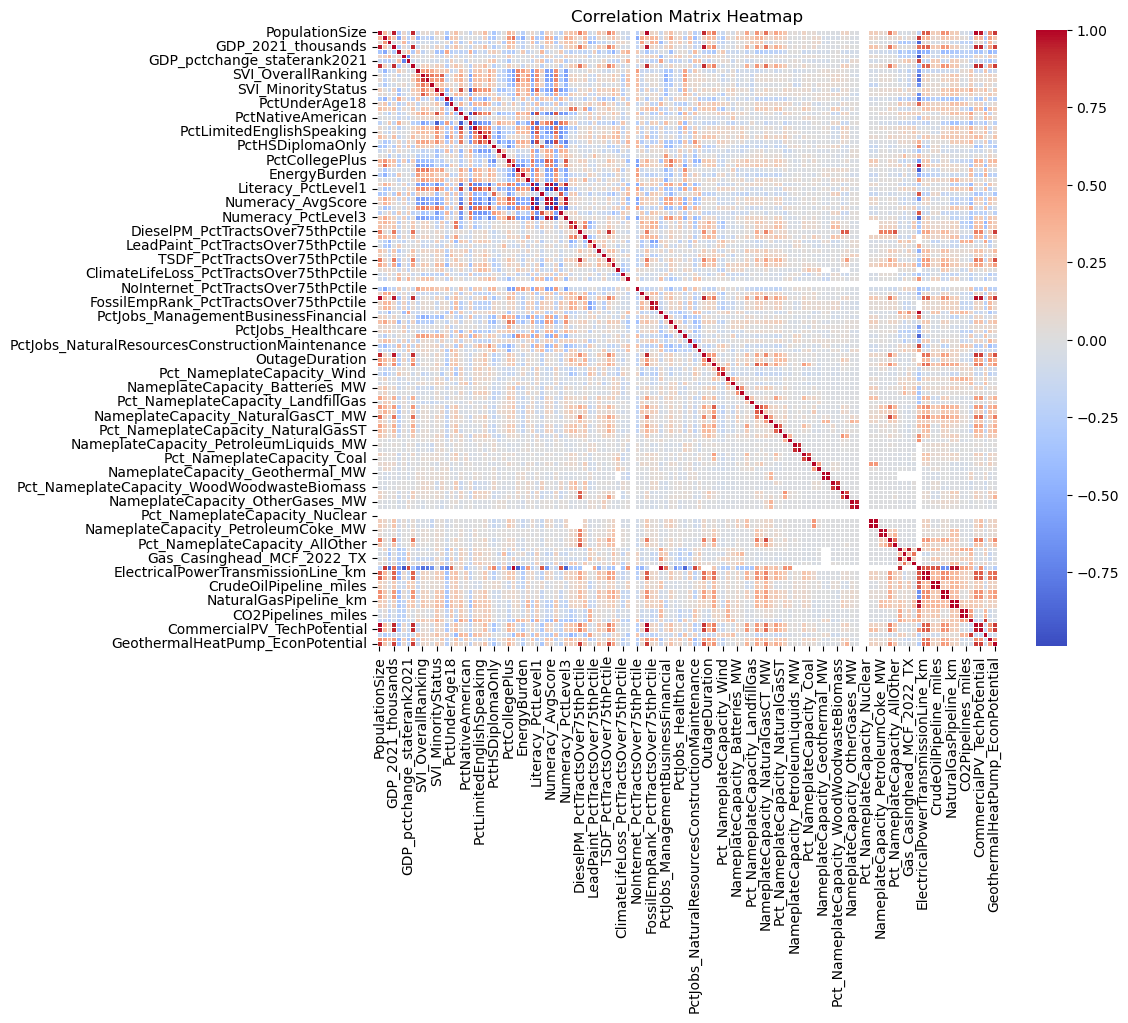

<Figure size 1500x1500 with 0 Axes>

In [2190]:
plt.figure(figsize=(10, 8)) # Optional: Adjust figure size for better readability
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
sns.heatmap(corr_matrix2, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.figure(figsize=(15, 15))
plt.show()

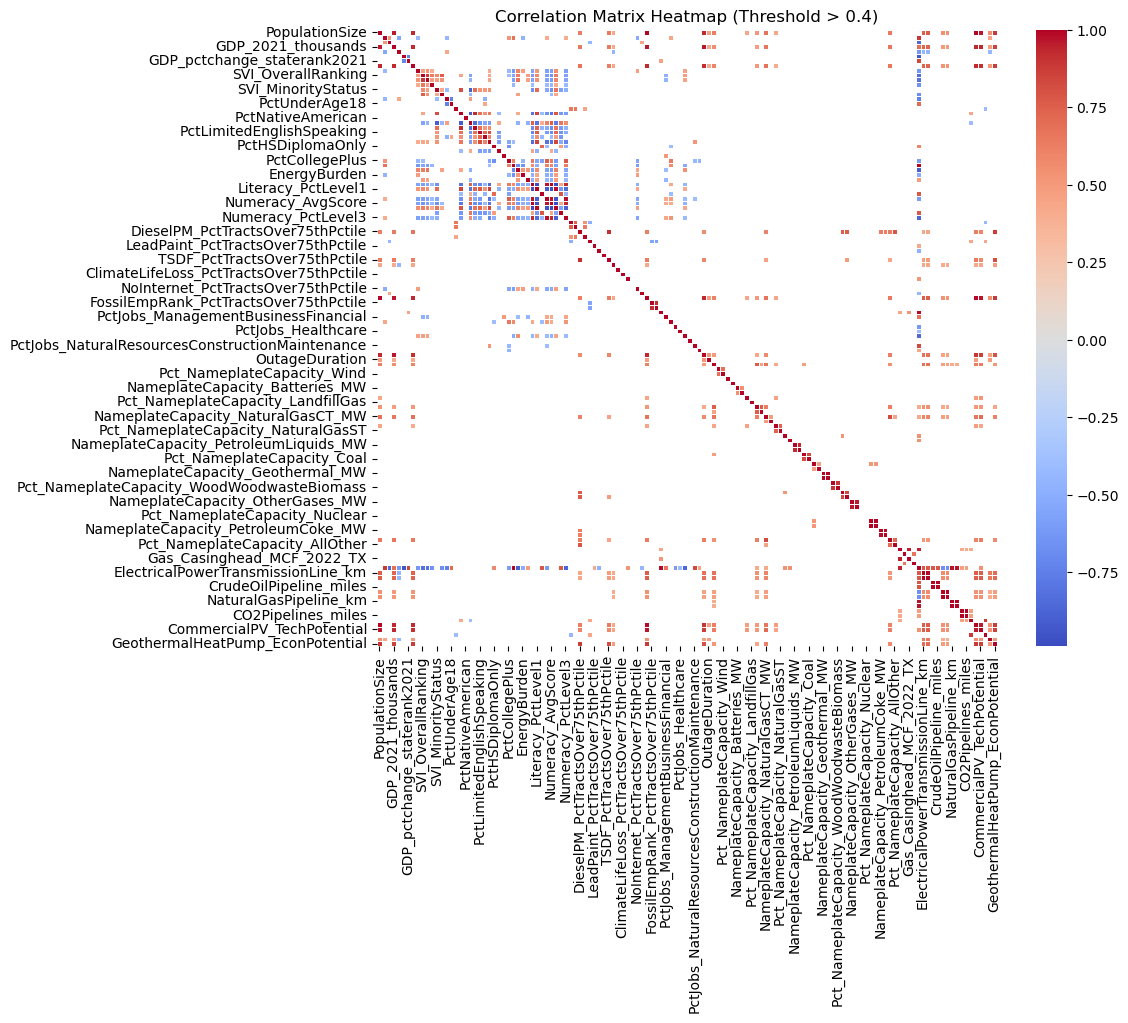

In [2192]:
threshold = 0.4
corr_matrix_filtered2 = corr_matrix2[abs(corr_matrix2) > threshold]

plt.figure(figsize=(10, 8)) # Optional: Adjust figure size for better readability
sns.heatmap(corr_matrix_filtered2, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix Heatmap (Threshold > {threshold})')
plt.show()


In [2194]:
#display(data_clean.columns.tolist()	)
all_cols  =  data_clean.select_dtypes(exclude='object').columns.tolist()
#display(all_cols)
select_cols = all_cols[8:41]
select_cols.append('NoInternet_PctTractsOver75thPctile')
display(select_cols)

['DAC_StatusYES_PctTracts',
 'SVI_OverallRanking',
 'SVI_Socioeconomic',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'SVI_HousingTransportation',
 'PctAge65andOlder',
 'PctUnderAge18',
 'PctBlackNonHispanic',
 'PctHispanic',
 'PctNativeAmerican',
 'PctWhiteNonHispanic',
 'PctMultipleRace',
 'PctLimitedEnglishSpeaking',
 'PctForeignBorn',
 'PctLessThanHS',
 'PctHSDiplomaOnly',
 'PctSomeCollege',
 'PctAssocDegree',
 'PctCollegePlus',
 'MedianHHInc',
 'PovertyRate',
 'EnergyBurden',
 'UnemploymentRate',
 'Literacy_AvgScore',
 'Literacy_PctLevel1',
 'Literacy_PctLevel2',
 'Literacy_PctLevel3',
 'Numeracy_AvgScore',
 'Numeracy_PctLevel1',
 'Numeracy_PctLevel2',
 'Numeracy_PctLevel3',
 'Cancer_PctTractsOver75thPctile',
 'NoInternet_PctTractsOver75thPctile']

In [2196]:
 data_clean.loc[:, select_cols]

DAC_StatusYES_PctTracts  SVI_OverallRanking  SVI_Socioeconomic  \
0                       34.6              0.7785             0.6805   
1                      100.0              0.4548             0.4411   
2                       81.2              0.9516             0.8466   
3                      100.0              0.9815             0.8358   
4                      100.0              0.9306             0.7199   
..                       ...                 ...                ...   
282                     60.0              0.7056             0.6053   
283                    100.0              0.4831             0.6404   
284                     25.0              0.5391             0.4955   
285                    100.0              0.9962             0.9920   
286                    100.0              0.9357             0.8943   

     SVI_HouseholdCharacteristics  SVI_MinorityStatus  \
0                          0.6814              0.9370   
1                          0.7126              0.5083   
2                          0.9780              0.9354   
3                          0.9761              0.9828   
4                          0.9223              0.8902   
..                            ...                 ...   
282                        0.8380              0.5162   
283                        0.2845              0.9593   
284                        0.9020              0.5866   
285                        0.9850              0.9984   
286                        0.9892              0.9978   

     SVI_HousingTransportation  PctAge65andOlder  PctUnderAge18  \
0                       0.6938         16.759998      21.091620   
1                       0.2479         42.609668      10.142498   
2                       0.8374         15.642218      26.376291   
3                       0.9835         16.763580      23.605182   
4                       0.9733         27.746831      18.398321   
..                         ...               ...            ...   
282                     0.6302         27.228330      18.491180   
283                     0.1875         11.671432      28.866649   
284                     0.2126         20.411933      23.613365   
285                     0.8736         13.024696      30.938152   
286                     0.4911         14.115822      28.448811   

     PctBlackNonHispanic  PctHispanic  PctNativeAmerican  PctWhiteNonHispanic  \
0               2.641904    48.707801           4.527795            37.453950   
1               0.977927    16.820341           1.313216            76.501816   
2               1.453413    56.934788           0.630784            37.517074   
3               0.934786    31.812160          43.305609            20.381275   
4               0.201824    47.452975           0.871882            48.066521   
..                   ...          ...                ...                  ...   
282             3.697344    10.913632           0.506211            80.070468   
283             0.714843    64.569795           0.285937            32.336886   
284             0.973862    19.633962           0.442156            75.048973   
285             0.064799    93.592051           0.050400             5.731154   
286             0.692865    92.492244           0.217166             5.915202   

     PctMultipleRace  PctLimitedEnglishSpeaking  PctForeignBorn  \
0          20.991982                        4.1       10.150700   
1          10.058676                        3.9        2.848366   
2          18.832973                        5.2       11.340634   
3          12.792581                        4.9        2.298050   
4          21.054331                        2.7        3.183943   
..               ...                        ...             ...   
282         7.865219                        0.8        4.083828   
283        23.368859                       13.1       20.007785   
284         8.400963                        3.8        7.740025   
285        45.49643

In [2198]:
corr_matrix3 = data_clean.loc[:,select_cols].corr()
display(corr_matrix3)

DAC_StatusYES_PctTracts  \
DAC_StatusYES_PctTracts                            1.000000   
SVI_OverallRanking                                 0.464375   
SVI_Socioeconomic                                  0.526489   
SVI_HouseholdCharacteristics                       0.408049   
SVI_MinorityStatus                                 0.258933   
SVI_HousingTransportation                          0.189784   
PctAge65andOlder                                   0.254583   
PctUnderAge18                                     -0.158603   
PctBlackNonHispanic                               -0.075381   
PctHispanic                                        0.300597   
PctNativeAmerican                                  0.074137   
PctWhiteNonHispanic                               -0.275928   
PctMultipleRace                                    0.209119   
PctLimitedEnglishSpeaking                          0.264751   
PctForeignBorn                                     0.070904   
PctLessThanHS                                      0.400821   
PctHSDiplomaOnly                                   0.243361   
PctSomeCollege                                    -0.098268   
PctAssocDegree                                    -0.234028   
PctCollegePlus                                    -0.428777   
MedianHHInc                                       -0.622341   
PovertyRate                                        0.594766   
EnergyBurden                                       0.479840   
UnemploymentRate                                   0.298254   
Literacy_AvgScore                                 -0.557169   
Literacy_PctLevel1                                 0.507367   
Literacy_PctLevel2                                 0.202003   
Literacy_PctLevel3                                -0.577597   
Numeracy_AvgScore                                 -0.573980   
Numeracy_PctLevel1                                 0.555489   
Numeracy_PctLevel2                                -0.175339   
Numeracy_PctLevel3                                -0.571797   
Cancer_PctTractsOver75thPctile                    -0.034858   
NoInternet_PctTractsOver75thPctile                 0.479701   

                                    SVI_OverallRanking  SVI_Socioeconomic  \
DAC_StatusYES_PctTracts                       0.464375           0.526489   
SVI_OverallRanking                            1.000000           0.880481   
SVI_Socioeconomic                             0.880481           1.000000   
SVI_HouseholdCharacteristics                  0.645034           0.480697   
SVI_MinorityStatus                            0.575311           0.473350   
SVI_HousingTransportation                     0.766542           0.538733   
PctAge65andOlder                             -0.184162          -0.149884   
PctUnderAge18                                 0.053844           0.044028   
PctBlackNonHispanic                           0.255805           0.231337   
PctHispanic                                   0.443801           0.365916   
PctNativeAmerican                             0.105968           0.091939   
PctWhiteNonHispanic                          -0.554961          -0.459994   
PctMultipleRace                               0.354422           0.263911   
PctLimitedEnglishSpeaking                     0.306259           0.296031   
PctForeignBorn                                0.209402           0.222188   
PctLessThanHS                                 0.438627           0.445017   
PctHSDiplomaOnly                              0.198610           0.149457   
PctSomeCollege                               -0.203678          -0.152187   
PctAssocDegree                               -0.174320          -0.212175   
PctCollegePlus                               -0.401811          -0.382286   
MedianHHInc                                  -0.546291          -0.581412   
PovertyRate                                   0.625549           0.659858   
EnergyBurden                                  0.304410     

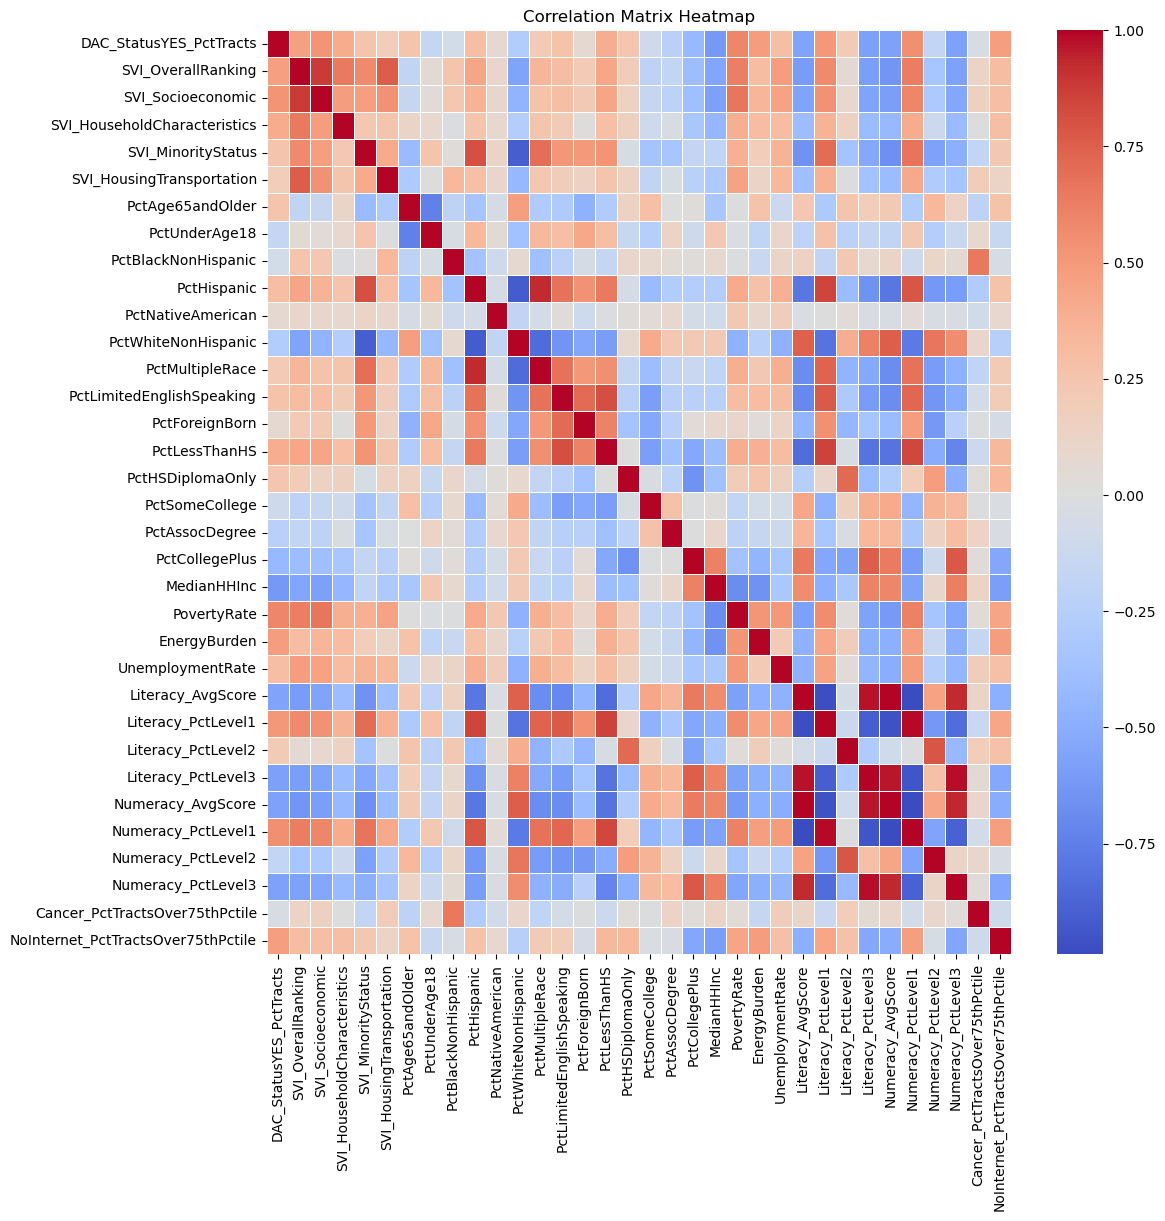

In [2200]:
plt.figure(figsize=(12, 12)) # Optional: Adjust figure size for better readability
sns.heatmap(corr_matrix3, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [2202]:
all_cols  =  data_clean.select_dtypes(exclude='object').columns.tolist()
#display(all_cols)
select_cols = all_cols[55:]
select_cols.append('NoInternet_PctTractsOver75thPctile')
display(select_cols)

['Over30minCommute_PctTractsOver75thPctile',
 'TotalWorkforce',
 'FossilEmpRank_PctTractsOver75thPctile',
 'CoalEmpRank_PctTractsOver75thPctile',
 'PctEmpExtraction',
 'PctJobs_ManagementBusinessFinancial',
 'PctJobs_ComputerEngineeringScience',
 'PctJobs_EducationLegalArtsMedia',
 'PctJobs_Healthcare',
 'PctJobs_Service',
 'PctJobs_SalesOffice',
 'PctJobs_NaturalResourcesConstructionMaintenance',
 'PctJobs_ProductionTransportation',
 'OutageNumber',
 'OutageDuration',
 'NameplateCapacity_Total_MW',
 'NameplateCapacity_Wind_MW',
 'Pct_NameplateCapacity_Wind',
 'NameplateCapacity_SolarPV_MW',
 'Pct_NameplateCapacity_SolarPV',
 'NameplateCapacity_Batteries_MW',
 'Pct_NameplateCapacity_Batteries',
 'NameplateCapacity_LandfillGas_MW',
 'Pct_NameplateCapacity_LandfillGas',
 'NameplateCapacity_NaturalGasCC_MW',
 'Pct_NameplateCapacity_NaturalGasCC',
 'NameplateCapacity_NaturalGasCT_MW',
 'Pct_NameplateCapacity_NaturalGasCT',
 'NameplateCapacity_NaturalGasST_MW',
 'Pct_NameplateCapacity_Natur

In [2204]:
corr_matrix4 = data_clean.loc[:,select_cols].corr()
display(corr_matrix4)

Over30minCommute_PctTractsOver75thPctile  \
Over30minCommute_PctTractsOver75thPctile                                  1.000000   
TotalWorkforce                                                            0.132227   
FossilEmpRank_PctTractsOver75thPctile                                     0.311468   
CoalEmpRank_PctTractsOver75thPctile                                       0.333872   
PctEmpExtraction                                                         -0.190458   
...                                                                            ...   
CommercialPV_TechPotential                                                0.118734   
LandbasedWind_TechPotential                                              -0.206847   
DistributedWind_TechPotential                                             0.202878   
GeothermalHeatPump_EconPotential                                          0.090075   
NoInternet_PctTractsOver75thPctile                                       -0.148200   

                                          TotalWorkforce  \
Over30minCommute_PctTractsOver75thPctile        0.132227   
TotalWorkforce                                  1.000000   
FossilEmpRank_PctTractsOver75thPctile           0.130177   
CoalEmpRank_PctTractsOver75thPctile             0.132275   
PctEmpExtraction                               -0.125640   
...                                                  ...   
CommercialPV_TechPotential                      0.967609   
LandbasedWind_TechPotential                    -0.142484   
DistributedWind_TechPotential                   0.542008   
GeothermalHeatPump_EconPotential                0.881820   
NoInternet_PctTractsOver75thPctile             -0.227212   

                                          FossilEmpRank_PctTractsOver75thPctile  \
Over30minCommute_PctTractsOver75thPctile                               0.311468   
TotalWorkforce                                                         0.130177   
FossilEmpRank_PctTractsOver75thPctile                                  1.000000   
CoalEmpRank_PctTractsOver75thPctile                                    0.921461   
PctEmpExtraction                                                      -0.147069   
...                                                                         ...   
CommercialPV_TechPotential                                             0.117441   
LandbasedWind_TechPotential                                           -0.215334   
DistributedWind_TechPotential                                          0.312809   
GeothermalHeatPump_EconPotential                                       0.097394   
NoInternet_PctTractsOver75thPctile                                    -0.113848   

                                          CoalEmpRank_PctTractsOver75thPctile  \
Over30minCommute_PctTractsOver75thPctile                             0.333872   
TotalWorkforce                                                       0.132275   
FossilEmpRank_PctTractsOver75thPctile                                0.921461   
CoalEmpRank_PctTractsOver75thPctile                                  1.000000   
PctEmpExtraction                                                    -0.152339   
...                                                                       ...   
CommercialPV_TechPotential                                           0.113013   
LandbasedWind_TechPotential                                         -0.206696   
DistributedWind_TechPotential                                        0.304130   
GeothermalHeatPump_EconPotential                                     0.097561   
NoInternet_PctTractsOver75thPctile                                  -0.113350   

                                          PctEmpExtraction  \
Over30minCommute_PctTractsOver75thPctile         -0.190458   
TotalWorkforce                                   -0.125640   
FossilEmpRank_PctTractsOver75thPctile            -0.147069   
CoalEmpRank_PctTractsOver75thPctile              -0.152339   
PctEmpEx

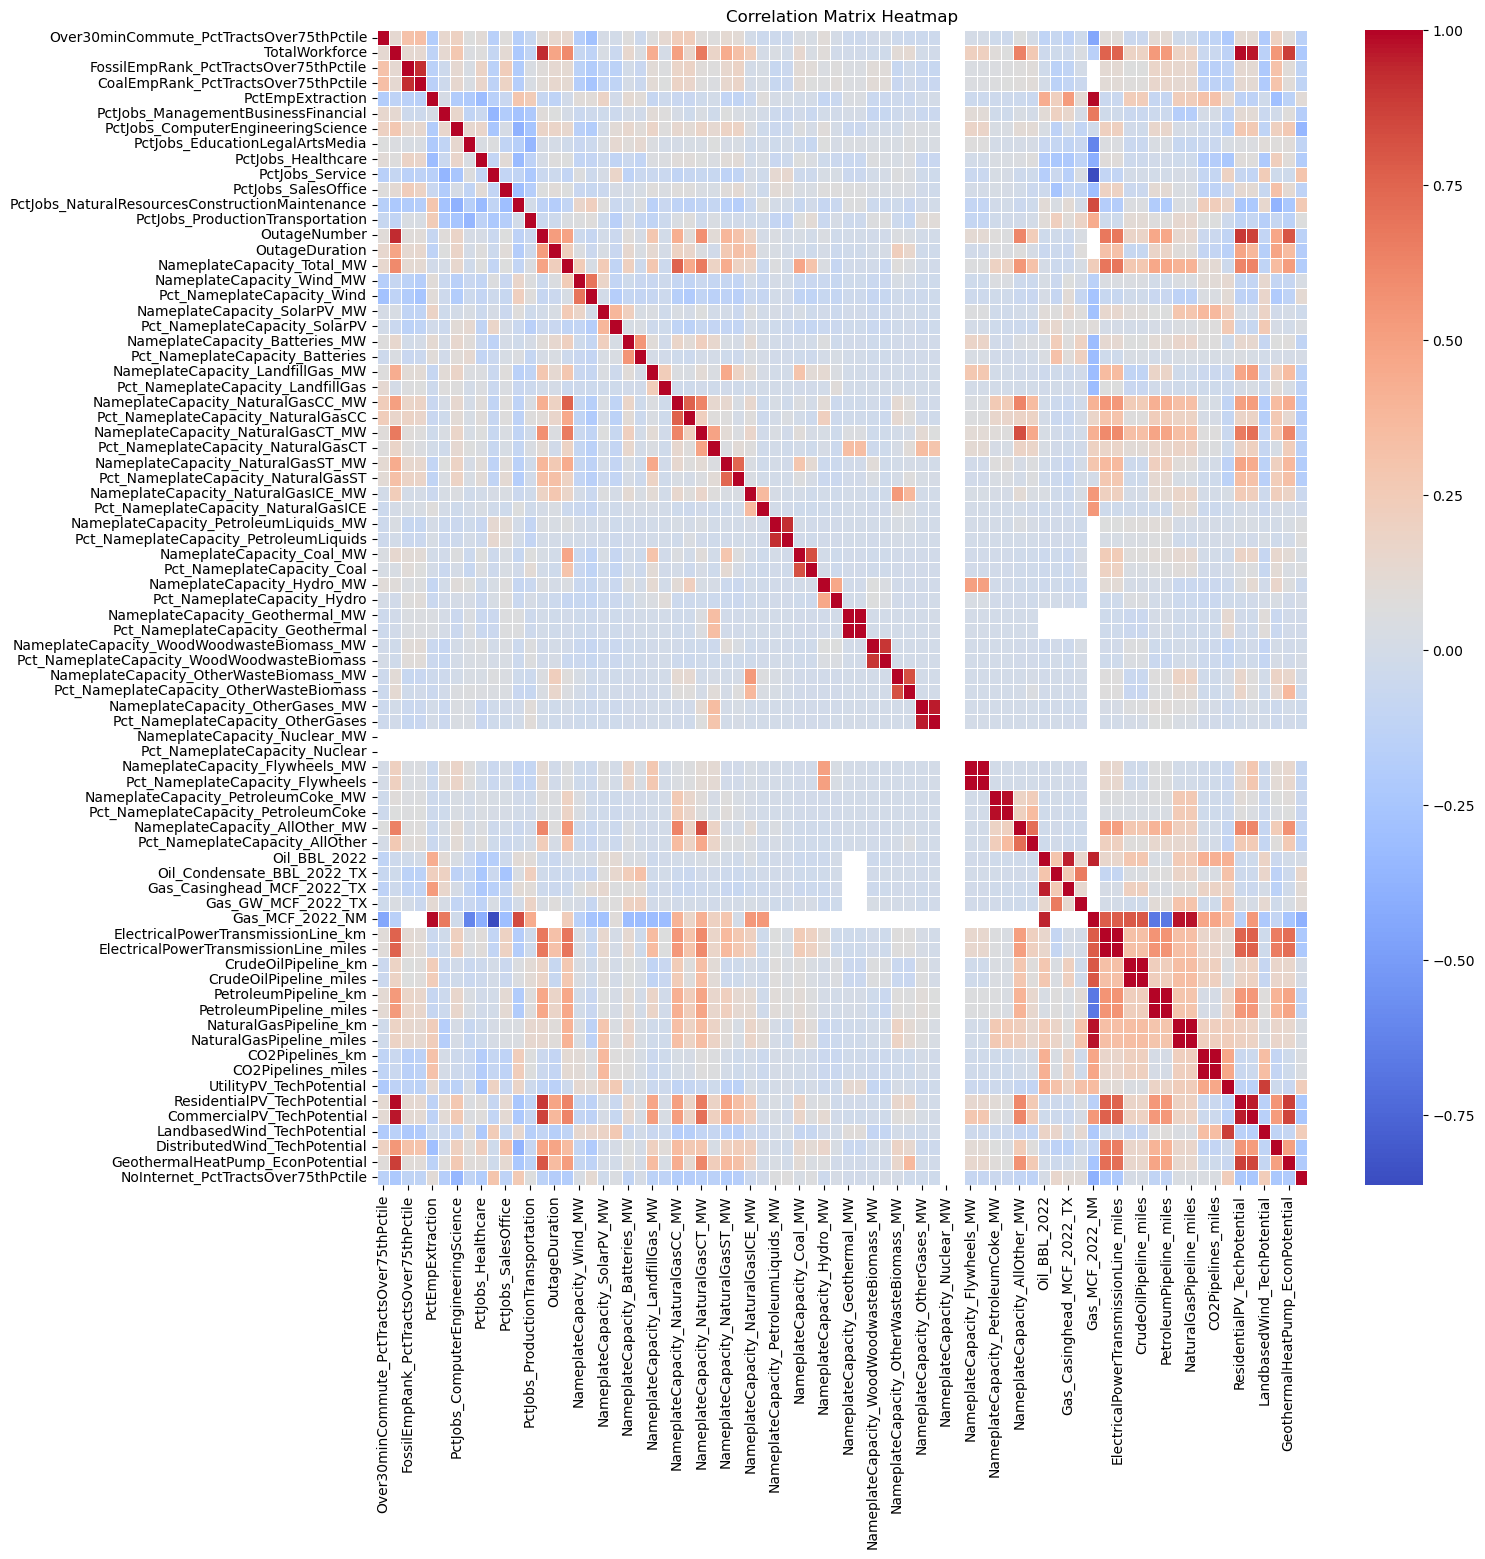

In [2206]:
plt.figure(figsize=(15, 15)) # Optional: Adjust figure size for better readability
sns.heatmap(corr_matrix4, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

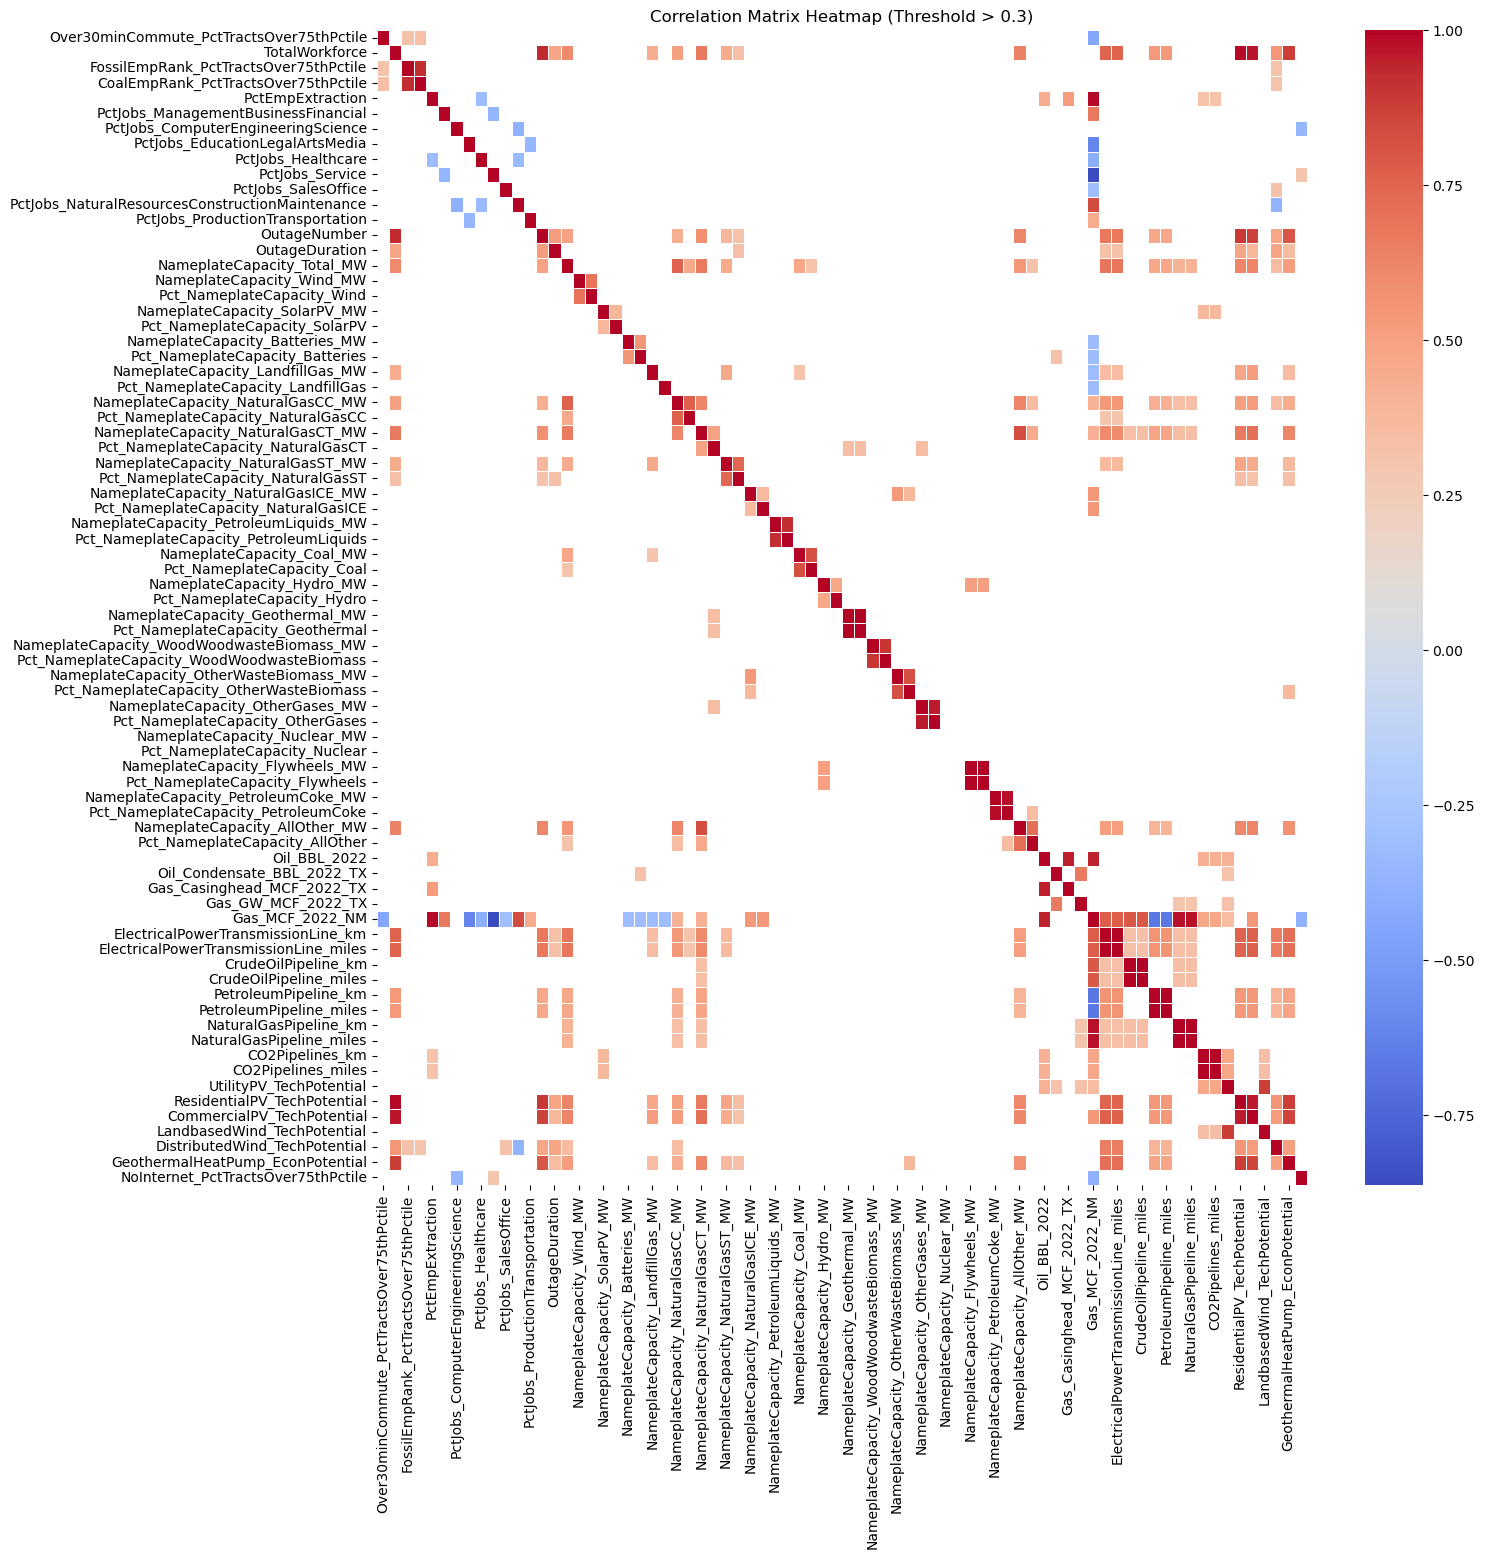

In [2208]:
threshold = 0.3
corr_matrix_filtered = corr_matrix4[abs(corr_matrix4) > threshold]

plt.figure(figsize=(15, 15)) # Optional: Adjust figure size for better readability
sns.heatmap(corr_matrix_filtered, cmap='coolwarm', fmt=".2f", linewidths=.5)
#plt.title('Correlation Matrix Heatmap')
plt.title(f'Correlation Matrix Heatmap (Threshold > {threshold})')
plt.show()


In [2210]:
corr_matrix_noInernet = corr_matrix_filtered['NoInternet_PctTractsOver75thPctile']
display(corr_matrix_noInernet)
corr_matrix_noIntenet_df = pd.DataFrame(corr_matrix_noInernet, columns=['Value'])
#columns_with_na = corr_matrix_noIntenet_df.columns[corr_matrix_noIntenet_df.isna().any()]
display(corr_matrix_noIntenet_df)

Over30minCommute_PctTractsOver75thPctile    NaN
TotalWorkforce                              NaN
FossilEmpRank_PctTractsOver75thPctile       NaN
CoalEmpRank_PctTractsOver75thPctile         NaN
PctEmpExtraction                            NaN
                                           ... 
CommercialPV_TechPotential                  NaN
LandbasedWind_TechPotential                 NaN
DistributedWind_TechPotential               NaN
GeothermalHeatPump_EconPotential            NaN
NoInternet_PctTractsOver75thPctile          1.0
Name: NoInternet_PctTractsOver75thPctile, Length: 76, dtype: float64

Empty DataFrame
Columns: [Value]
Index: []

In [2212]:
#corr_matrix4
corr_matrix_noInernet = corr_matrix4[['NoInternet_PctTractsOver75thPctile']]
display(corr_matrix_noInernet)
df3 = corr_matrix_noInernet.query('abs(NoInternet_PctTractsOver75thPctile) > 0.15')
#columns_with_na = corr_matrix_noIntenet_df.columns[corr_matrix_noIntenet_df.isna().any()]
display(df3.sort_values('NoInternet_PctTractsOver75thPctile', ascending=False))


NoInternet_PctTractsOver75thPctile
Over30minCommute_PctTractsOver75thPctile                           -0.148200
TotalWorkforce                                                     -0.227212
FossilEmpRank_PctTractsOver75thPctile                              -0.113848
CoalEmpRank_PctTractsOver75thPctile                                -0.113350
PctEmpExtraction                                                    0.102666
...                                                                      ...
CommercialPV_TechPotential                                         -0.242318
LandbasedWind_TechPotential                                         0.239282
DistributedWind_TechPotential                                      -0.235725
GeothermalHeatPump_EconPotential                                   -0.207679
NoInternet_PctTractsOver75thPctile                                  1.000000

[76 rows x 1 columns]

NoInternet_PctTractsOver75thPctile
NoInternet_PctTractsOver75thPctile                                         1.000000
PctJobs_Service                                                            0.300805
PctJobs_NaturalResourcesConstructionMaintenance                            0.259159
LandbasedWind_TechPotential                                                0.239282
UtilityPV_TechPotential                                                    0.235728
NameplateCapacity_NaturalGasCT_MW                                         -0.156963
PctJobs_ManagementBusinessFinancial                                       -0.173336
Pct_NameplateCapacity_NaturalGasST                                        -0.176122
Pct_NameplateCapacity_NaturalGasCC                                        -0.178947
OutageDuration                                                            -0.180451
NameplateCapacity_Total_MW                                                -0.186102
NameplateCapacity_NaturalGasCC_MW                                         -0.188945
NameplateCapacity_NaturalGasST_MW                                         -0.189392
PctJobs_Healthcare                                                        -0.190699
GeothermalHeatPump_EconPotential                                          -0.207679
TotalWorkforce                                                            -0.227212
ElectricalPowerTransmissionLine_km                                        -0.229288
ElectricalPowerTransmissionLine_miles                                     -0.229292
ResidentialPV_TechPotential                                               -0.233228
DistributedWind_TechPotential                                             -0.235725
CommercialPV_TechPotential                                                -0.242318
PctJobs_ComputerEngineeringScience                                        -0.352054
Gas_MCF_2022_NM                                                           -0.386297

In [2214]:
#corr_matrix4
corr_matrix_noInernet = corr_matrix4[['NoInternet_PctTractsOver75thPctile']]
#display(corr_matrix_noInernet)
df3 = corr_matrix_noInernet.query('abs(NoInternet_PctTractsOver75thPctile) > 0.20')
#columns_with_na = corr_matrix_noIntenet_df.columns[corr_matrix_noIntenet_df.isna().any()]
display(df3.sort_values('NoInternet_PctTractsOver75thPctile', ascending=False))


NoInternet_PctTractsOver75thPctile
NoInternet_PctTractsOver75thPctile                                         1.000000
PctJobs_Service                                                            0.300805
PctJobs_NaturalResourcesConstructionMaintenance                            0.259159
LandbasedWind_TechPotential                                                0.239282
UtilityPV_TechPotential                                                    0.235728
GeothermalHeatPump_EconPotential                                          -0.207679
TotalWorkforce                                                            -0.227212
ElectricalPowerTransmissionLine_km                                        -0.229288
ElectricalPowerTransmissionLine_miles                                     -0.229292
ResidentialPV_TechPotential                                               -0.233228
DistributedWind_TechPotential                                             -0.235725
CommercialPV_TechPotential                                                -0.242318
PctJobs_ComputerEngineeringScience                                        -0.352054
Gas_MCF_2022_NM                                                           -0.386297

In [2216]:
df4 = df3.reset_index()
df4
display(df4.sort_values('NoInternet_PctTractsOver75thPctile', ascending=False))
df4['index'].tolist()

index  \
13               NoInternet_PctTractsOver75thPctile   
2                                   PctJobs_Service   
3   PctJobs_NaturalResourcesConstructionMaintenance   
10                      LandbasedWind_TechPotential   
7                           UtilityPV_TechPotential   
12                 GeothermalHeatPump_EconPotential   
0                                    TotalWorkforce   
5                ElectricalPowerTransmissionLine_km   
6             ElectricalPowerTransmissionLine_miles   
8                       ResidentialPV_TechPotential   
11                    DistributedWind_TechPotential   
9                        CommercialPV_TechPotential   
1                PctJobs_ComputerEngineeringScience   
4                                   Gas_MCF_2022_NM   

    NoInternet_PctTractsOver75thPctile  
13                            1.000000  
2                             0.300805  
3                             0.259159  
10                            0.239282  
7                             0.235728  
12                           -0.207679  
0                            -0.227212  
5                            -0.229288  
6                            -0.229292  
8                            -0.233228  
11                           -0.235725  
9                            -0.242318  
1                            -0.352054  
4                            -0.386297

['TotalWorkforce',
 'PctJobs_ComputerEngineeringScience',
 'PctJobs_Service',
 'PctJobs_NaturalResourcesConstructionMaintenance',
 'Gas_MCF_2022_NM',
 'ElectricalPowerTransmissionLine_km',
 'ElectricalPowerTransmissionLine_miles',
 'UtilityPV_TechPotential',
 'ResidentialPV_TechPotential',
 'CommercialPV_TechPotential',
 'LandbasedWind_TechPotential',
 'DistributedWind_TechPotential',
 'GeothermalHeatPump_EconPotential',
 'NoInternet_PctTractsOver75thPctile']

In [2218]:
import seaborn as sns5
#sns.pairplot(data_clean)
data_clean.head(10)

PopulationSize  PopulationChangeRate_2010_2020  \
0          674393                        2.094892   
1            3731                       -3.919463   
2           64629                       -0.743392   
3           27184                       -0.150663   
4           12369                       -9.912727   
5           47999                        0.111626   
6            1680                      -16.023739   
7          221508                        4.936124   
8           60911                       15.762879   
9           27889                       -4.502948   

   PopulationChangeRate_2020_2021  GDP_2021_thousands  GDP_staterank2021  \
0                       -0.323391            35421924                  1   
1                        3.294574               85856                 31   
2                       -0.827093             1887351                 12   
3                        0.398877              559748                 20   
4                        0.300032              426659                 24   
5                       -0.674599             2892180                  8   
6                        0.119190               79599                 32   
7                        0.731700             6847115                  3   
8                       -2.162006             7359252                  2   
9                       -1.134390              957071                 15   

   GDP_pctchange_2020_2021  GDP_pctchange_staterank2021  \
0                      4.9                            7   
1                      1.2                           16   
2                     -3.1                           24   
3                     -4.2                           27   
4                      0.2                           19   
5                      1.4                           15   
6                     -5.8                           29   
7                      3.0                           10   
8                    -12.0                           31   
9                     -0.6                           21   

   DAC_StatusYES_NumTracts  DAC_StatusYES_PctTracts  SVI_OverallRanking  \
0                       53                     34.6              0.7785   
1                        1                    100.0              0.4548   
2                       13                     81.2              0.9516   
3                        7                    100.0              0.9815   
4                        3                    100.0              0.9306   
5                        4                     33.3              0.9281   
6                        1                    100.0              0.5891   
7                       27                     65.9              0.9898   
8                        6                     50.0              0.6935   
9                        6                     75.0              0.9004   

   SVI_Socioeconomic  SVI_HouseholdCharacteristics  SVI_MinorityStatus  \
0             0.6805                        0.6814              0.9370   
1             0.4411                        0.7126              0.5083   
2             0.8466                        0.9780              0.9354   
3             0.8358                        0.9761              0.9828   
4             0.7199                        0.9223              0.8902   
5             0.9523                        0.9609              0.8892   
6             0.7782                        0.2447              0.9621   
7             0.9723                        0.9201              0.9717   
8             0.4589                        0.9026              0.8956   
9             0.7339                        0.8230              0.8937   

   SVI_HousingTransportation  PctAge65andOlder  PctUnderAge18  \
0                     0.6938         16.759998      21.091620   
1                     0.2479         42.609668      10.142498   
2                     0.8374         15.642218      26.376291   
3                     0.9835   

### now do anlaysis on selected columns

In [2221]:
all_cols = data_clean.columns.tolist()
select_cols = ['PopulationSize', 'PopulationChangeRate_2010_2020', 'PopulationChangeRate_2020_2021', 'GDP_2021_thousands', 'DAC_StatusYES_PctTracts', \
    'SVI_OverallRanking', 'SVI_Socioeconomic', 'SVI_HouseholdCharacteristics', 'SVI_MinorityStatus', 'PctAge65andOlder', 'PctUnderAge18', 'PctHispanic', 'MedianHHInc', \
    'PovertyRate', 'UnemploymentRate', 'NoInternet_PctTractsOver75thPctile']
#all_cols
select_data = data_clean[select_cols]
select_data.head(10)

PopulationSize  PopulationChangeRate_2010_2020  \
0          674393                        2.094892   
1            3731                       -3.919463   
2           64629                       -0.743392   
3           27184                       -0.150663   
4           12369                       -9.912727   
5           47999                        0.111626   
6            1680                      -16.023739   
7          221508                        4.936124   
8           60911                       15.762879   
9           27889                       -4.502948   

   PopulationChangeRate_2020_2021  GDP_2021_thousands  \
0                       -0.323391            35421924   
1                        3.294574               85856   
2                       -0.827093             1887351   
3                        0.398877              559748   
4                        0.300032              426659   
5                       -0.674599             2892180   
6                        0.119190               79599   
7                        0.731700             6847115   
8                       -2.162006             7359252   
9                       -1.134390              957071   

   DAC_StatusYES_PctTracts  SVI_OverallRanking  SVI_Socioeconomic  \
0                     34.6              0.7785             0.6805   
1                    100.0              0.4548             0.4411   
2                     81.2              0.9516             0.8466   
3                    100.0              0.9815             0.8358   
4                    100.0              0.9306             0.7199   
5                     33.3              0.9281             0.9523   
6                    100.0              0.5891             0.7782   
7                     65.9              0.9898             0.9723   
8                     50.0              0.6935             0.4589   
9                     75.0              0.9004             0.7339   

   SVI_HouseholdCharacteristics  SVI_MinorityStatus  PctAge65andOlder  \
0                        0.6814              0.9370         16.759998   
1                        0.7126              0.5083         42.609668   
2                        0.9780              0.9354         15.642218   
3                        0.9761              0.9828         16.763580   
4                        0.9223              0.8902         27.746831   
5                        0.9609              0.8892         12.709065   
6                        0.2447              0.9621         28.680801   
7                        0.9201              0.9717         16.132191   
8                        0.9026              0.8956         14.158937   
9                        0.8230              0.8937         28.249069   

   PctUnderAge18  PctHispanic  MedianHHInc  PovertyRate  UnemploymentRate  \
0      21.091620    48.707801      56920.0    16.091456               6.2   
1      10.142498    16.820341      37623.0    22.448403               6.2   
2      26.376291    56.934788      47620.0    21.241814               7.1   
3      23.605182    31.812160      47300.0    27.860370               9.3   
4      18.398321    47.452975      39483.0    19.644970               5.9   
5      26.774726    45.005162      51199.0    19.503449               4.9   
6      19.905772    38.515901      32750.0    17.726293               5.1   
7      23.874459    67.257846      47151.0    23.197932               6.6   
8      26.307090    50.240716      67759.0    14.700088               6.4   
9      18.995920    47.777186      39429.0    22.067121               7.3   

   NoInternet_PctTractsOver75thPctile  
0                           26.143791  
1                          100.000000  
2                           75.000000  
3                          100.000000  
4                          100.000000  
5                           41.666667  
6                          100.000000  
7                           68.292683  
8                  

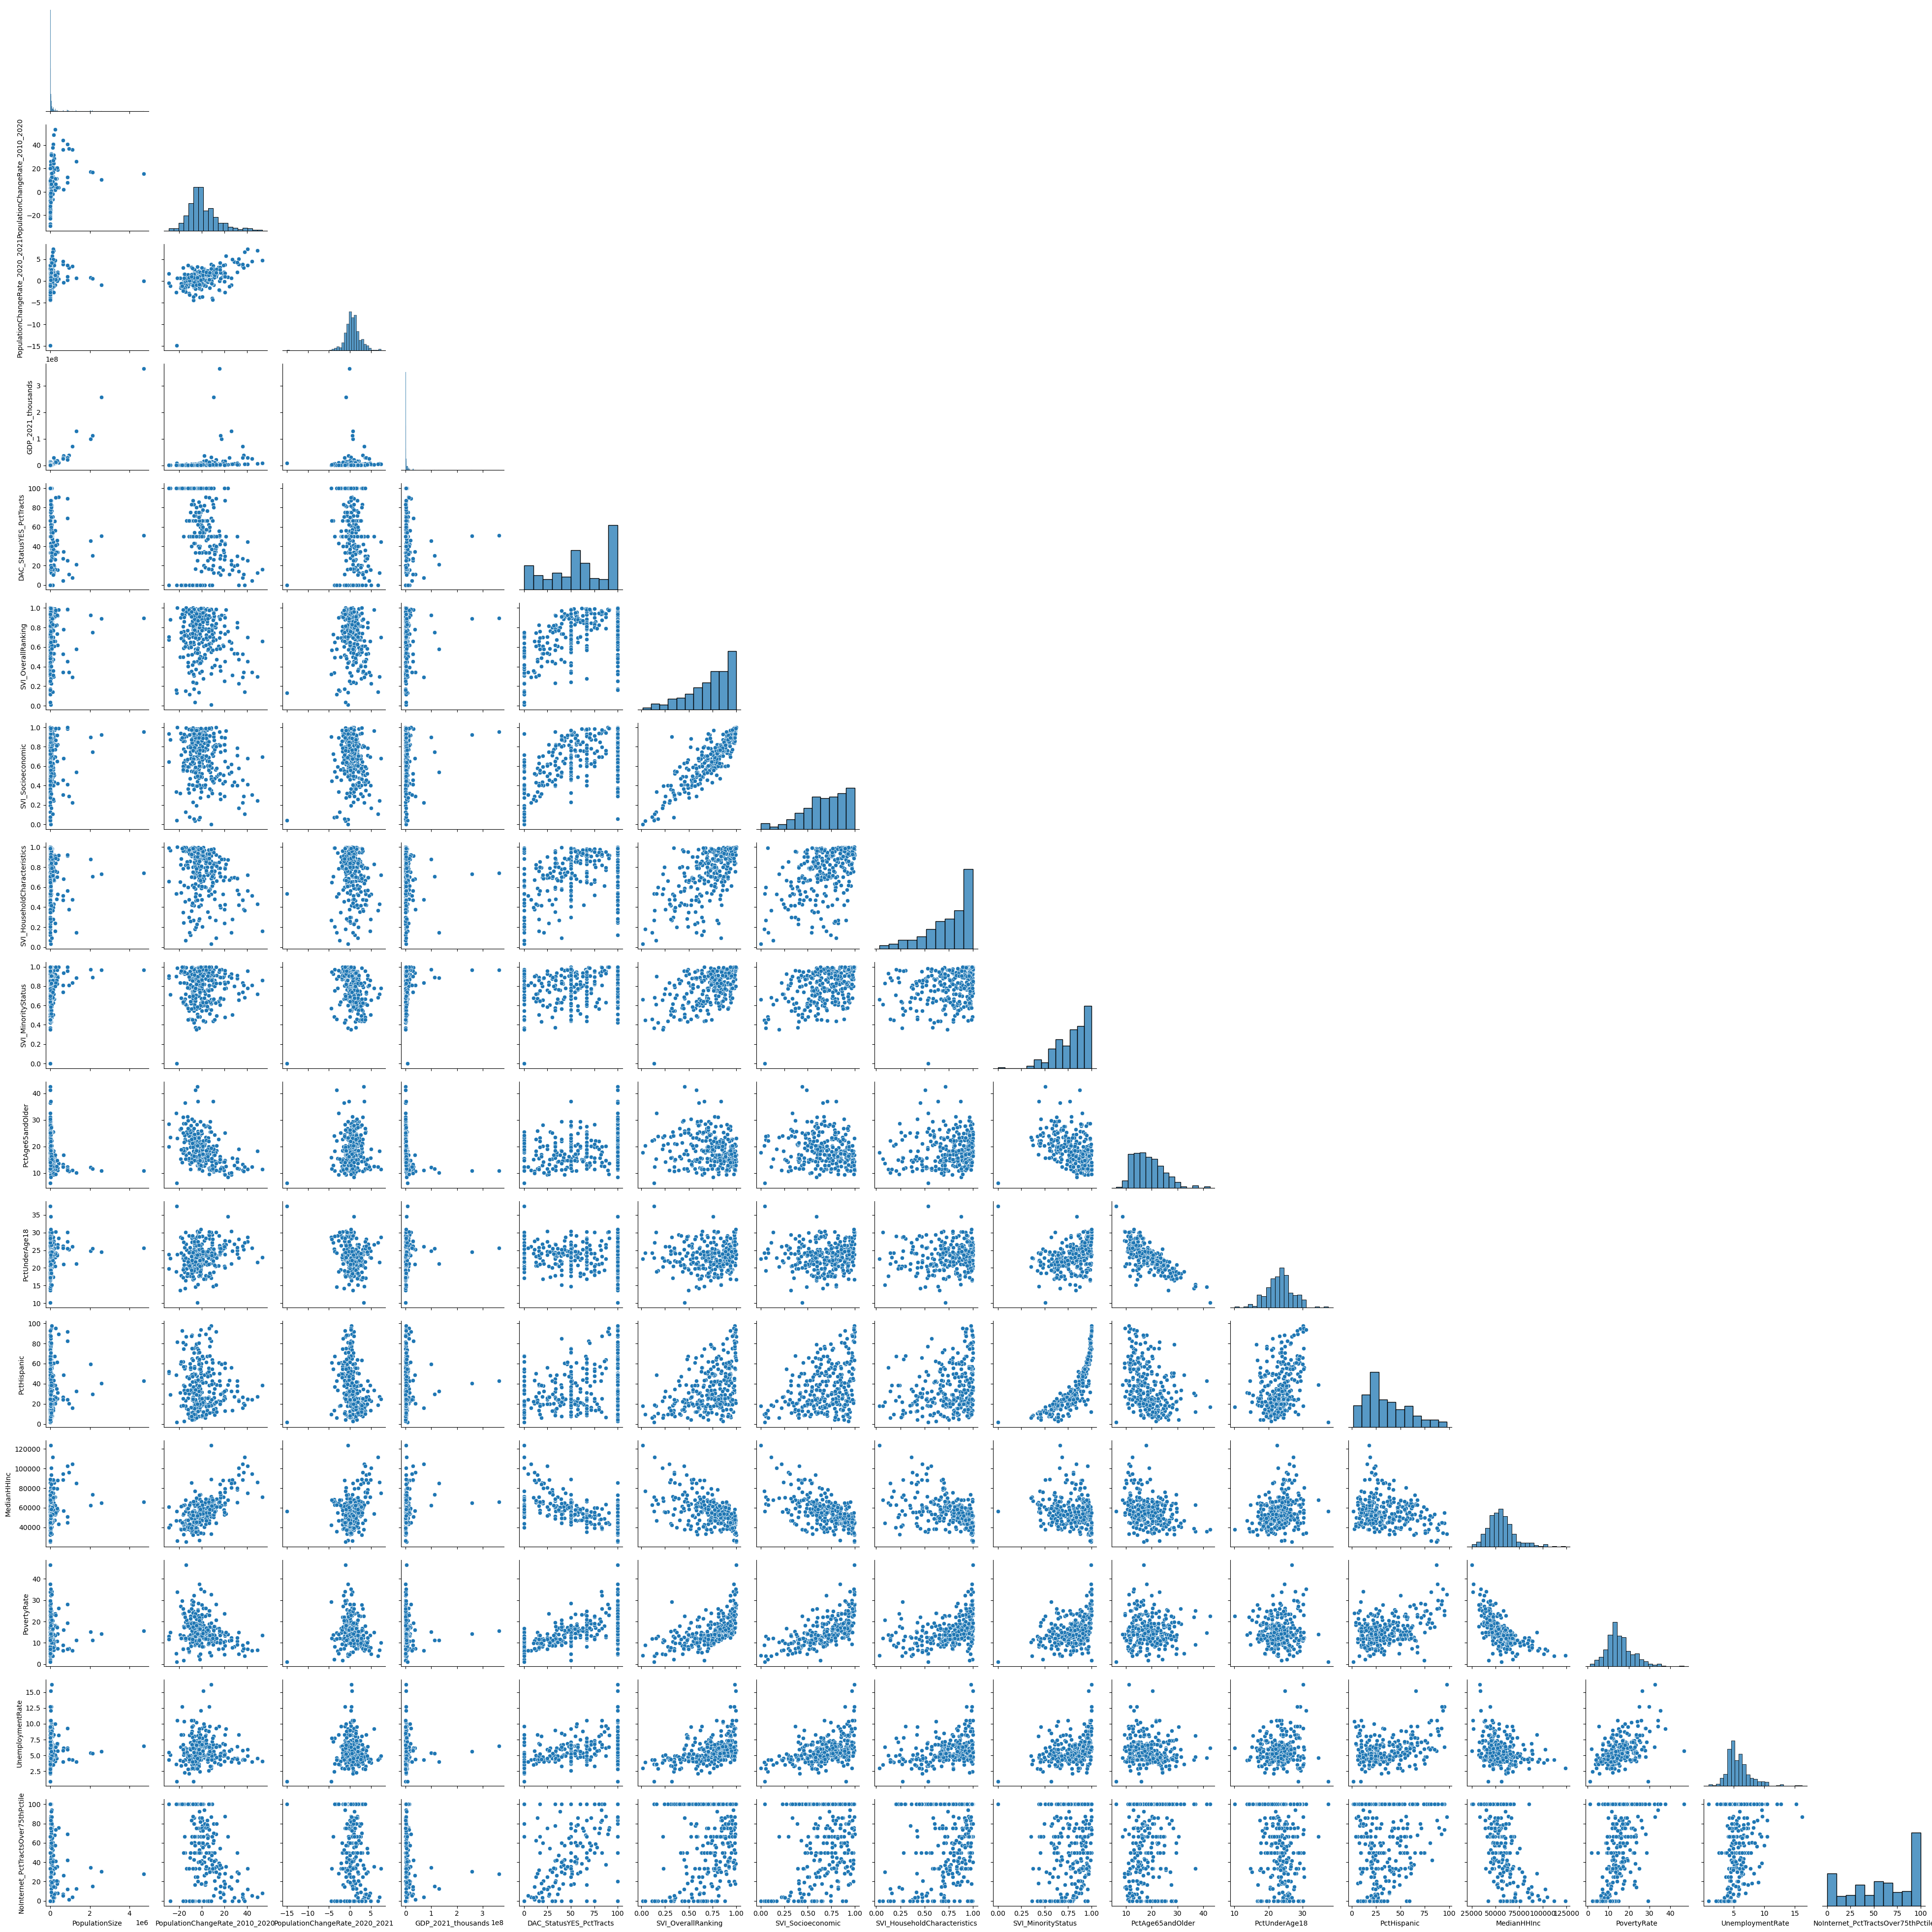

In [2227]:
import seaborn as sns
sns.pairplot(select_data,  corner=True)

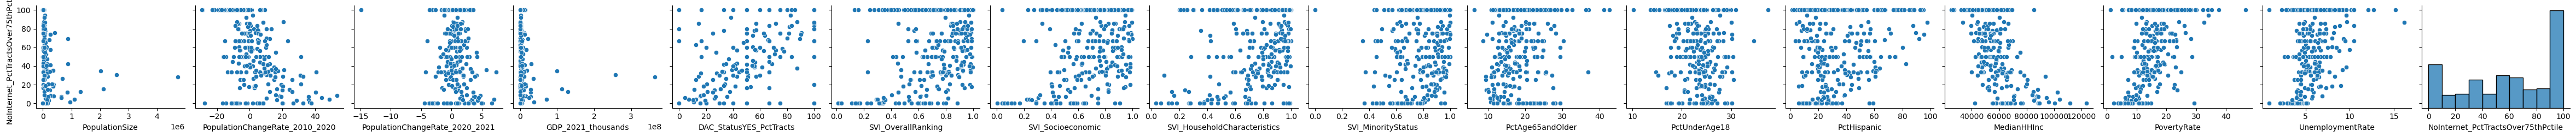

In [2229]:
feature_cols = ['PopulationSize', 'PopulationChangeRate_2010_2020', 'PopulationChangeRate_2020_2021', 'GDP_2021_thousands', 'DAC_StatusYES_PctTracts', \
    'SVI_OverallRanking', 'SVI_Socioeconomic', 'SVI_HouseholdCharacteristics', 'SVI_MinorityStatus', 'PctAge65andOlder', 'PctUnderAge18', 'PctHispanic', 'MedianHHInc', \
    'PovertyRate', 'UnemploymentRate', 'NoInternet_PctTractsOver75thPctile']
#all_cols
feature_col_data = data_clean[feature_cols]
import seaborn as sns
sns.pairplot(data_clean, x_vars=feature_col_data, y_vars='NoInternet_PctTractsOver75thPctile',  height=2.5, aspect=1.2)
# Create a pairplot with regression lines
#sns.pairplot(data_clean, x_vars=feature_col_data, y_vars='NoInternet_PctTractsOver75thPctile',  height=2.5, aspect=1.2, kind='reg')

#plt.show()
plt.savefig("data/sns_pairplot_NoInternet_PctTractsOver75thPctile.png")
plt.show()


In [ ]:
# Note; pair plots show some positive or negative correlations for variables


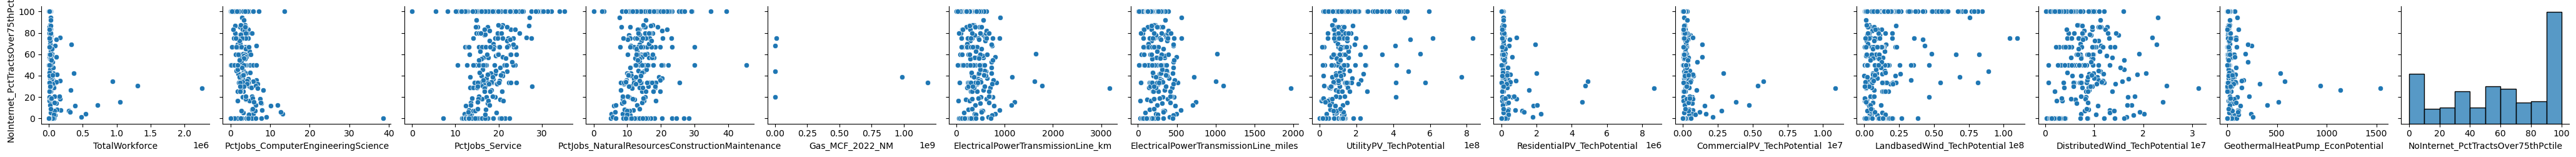

In [2231]:
feature_cols_using_corr_matrix = ['TotalWorkforce',
 'PctJobs_ComputerEngineeringScience',
 'PctJobs_Service',
 'PctJobs_NaturalResourcesConstructionMaintenance',
 'Gas_MCF_2022_NM',
 'ElectricalPowerTransmissionLine_km',
 'ElectricalPowerTransmissionLine_miles',
 'UtilityPV_TechPotential',
 'ResidentialPV_TechPotential',
 'CommercialPV_TechPotential',
 'LandbasedWind_TechPotential',
 'DistributedWind_TechPotential',
 'GeothermalHeatPump_EconPotential',
 'NoInternet_PctTractsOver75thPctile']

#all_cols
feature_col_data = data_clean[feature_cols_using_corr_matrix]
import seaborn as sns
sns.pairplot(data_clean, x_vars=feature_col_data, y_vars='NoInternet_PctTractsOver75thPctile',  height=2.5, aspect=1.2)
# Create a pairplot with regression lines
#sns.pairplot(data_clean, x_vars=feature_col_data, y_vars='NoInternet_PctTractsOver75thPctile',  height=2.5, aspect=1.2, kind='reg')

#plt.show()
plt.savefig("data/sns_pairplot_2_NoInternet_PctTractsOver75thPctile.png")
plt.show()

In [2233]:
# Note; pair plots do NOT show  positive or negative correlations for variables
# so use 1st set of feature_col variables --
feature_cols = ['PopulationSize', 'PopulationChangeRate_2010_2020', 'PopulationChangeRate_2020_2021', 'GDP_2021_thousands', 'DAC_StatusYES_PctTracts', \
    'SVI_OverallRanking', 'SVI_Socioeconomic', 'SVI_HouseholdCharacteristics', 'SVI_MinorityStatus', 'PctAge65andOlder', 'PctUnderAge18', 'PctHispanic', 'MedianHHInc', \
    'PovertyRate', 'UnemploymentRate', 'NoInternet_PctTractsOver75thPctile']


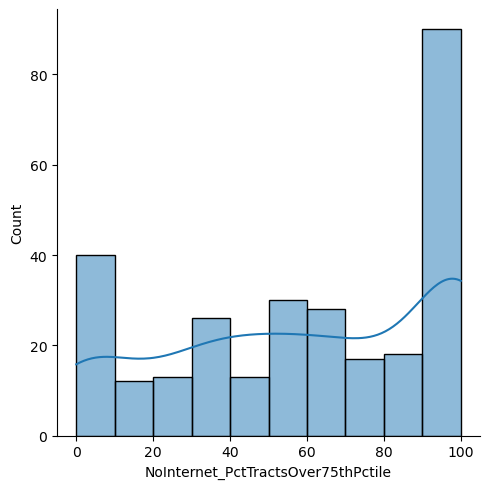

In [2235]:
sns.displot(data_clean["NoInternet_PctTractsOver75thPctile"], kde=True)

In [2237]:
#sns.displot(log(data_clean["NoInternet_PctTractsOver75thPctile"]), kde=True)

THIS CELL NOT USED
 PCA Analysis
X = data_clean[feature_cols]
mu = X.mean()
sigma =  X.std()
Xnorm = (X - mu) / sigma

Xnorm2 = Xnorm.dropna(axis =1)


from scipy.linalg import svd
U, sigma, Vt = svd(Xnorm2, full_matrices=False)

Supervised Learning
---------------------
Supervised learning algorithms used in analysis: 
- Regression Analysis (Linear Regression only)
- Scaled Ridge Regression
- Scaled Lasso Regression - to select significant columns
- final scaled ridge regression model using significant columns from Lasso regression


In [2242]:
# this will hold the summary results for all models built
summary_results_table=[]
model_summary_df = pd.DataFrame(summary_results_table, columns=['Model_Type', 'Feature_Selection', 'Data_Scaled', 'TrainMSE', 'TestMSE'])


In [2244]:
all_cols = data_clean.columns.tolist()
all_cols

['PopulationSize',
 'PopulationChangeRate_2010_2020',
 'PopulationChangeRate_2020_2021',
 'GDP_2021_thousands',
 'GDP_staterank2021',
 'GDP_pctchange_2020_2021',
 'GDP_pctchange_staterank2021',
 'DAC_StatusYES_NumTracts',
 'DAC_StatusYES_PctTracts',
 'SVI_OverallRanking',
 'SVI_Socioeconomic',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'SVI_HousingTransportation',
 'PctAge65andOlder',
 'PctUnderAge18',
 'PctBlackNonHispanic',
 'PctHispanic',
 'PctNativeAmerican',
 'PctWhiteNonHispanic',
 'PctMultipleRace',
 'PctLimitedEnglishSpeaking',
 'PctForeignBorn',
 'PctLessThanHS',
 'PctHSDiplomaOnly',
 'PctSomeCollege',
 'PctAssocDegree',
 'PctCollegePlus',
 'MedianHHInc',
 'PovertyRate',
 'EnergyBurden',
 'UnemploymentRate',
 'Literacy_AvgScore',
 'Literacy_PctLevel1',
 'Literacy_PctLevel2',
 'Literacy_PctLevel3',
 'Numeracy_AvgScore',
 'Numeracy_PctLevel1',
 'Numeracy_PctLevel2',
 'Numeracy_PctLevel3',
 'HealthRank_HealthOutcomes',
 'HealthRank_LengthOfLife',
 'HealthRank_Qualit

In [2246]:
#data_clean.drop(['CountyFIPS', 'County', 'State'], axis=1, inplace=True)


In [2248]:
data_clean['NoInternet_PctTractsOver75thPctile']

0       26.143791
1      100.000000
2       75.000000
3      100.000000
4      100.000000
          ...    
282     30.000000
283     50.000000
284     25.000000
285    100.000000
286    100.000000
Name: NoInternet_PctTractsOver75thPctile, Length: 287, dtype: float64

In [2250]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

y = data_clean[['NoInternet_PctTractsOver75thPctile']]
select_cols = ['PopulationSize', 'PopulationChangeRate_2010_2020', 'PopulationChangeRate_2020_2021', 'GDP_2021_thousands', 'DAC_StatusYES_PctTracts', \
    'SVI_OverallRanking', 'SVI_Socioeconomic', 'SVI_HouseholdCharacteristics', 'SVI_MinorityStatus', 'PctAge65andOlder', 'PctUnderAge18', 'PctHispanic', 'MedianHHInc', \
    'PovertyRate', 'UnemploymentRate']
#, 'NoInternet_PctTractsOver75thPctile']

X = data_clean[select_cols]
#X = X.drop('NoInternet_PctTractsOver75thPctile', axis = 1)

display(y)
display(X)

NoInternet_PctTractsOver75thPctile
0                             26.143791
1                            100.000000
2                             75.000000
3                            100.000000
4                            100.000000
..                                  ...
282                           30.000000
283                           50.000000
284                           25.000000
285                          100.000000
286                          100.000000

[287 rows x 1 columns]

PopulationSize  PopulationChangeRate_2010_2020  \
0            674393                        2.094892   
1              3731                       -3.919463   
2             64629                       -0.743392   
3             27184                       -0.150663   
4             12369                       -9.912727   
..              ...                             ...   
282           45875                        6.860642   
283            7607                       -2.348014   
284           17977                       -3.681941   
285           13908                       -0.920245   
286            9534                      -17.187634   

     PopulationChangeRate_2020_2021  GDP_2021_thousands  \
0                         -0.323391            35421924   
1                          3.294574               85856   
2                         -0.827093             1887351   
3                          0.398877              559748   
4                          0.300032              426659   
..                              ...                 ...   
282                        1.921795             1739620   
283                       -0.808450             2612559   
284                        0.773586              922003   
285                        0.172861              831666   
286                       -1.222545              953007   

     DAC_StatusYES_PctTracts  SVI_OverallRanking  SVI_Socioeconomic  \
0                       34.6              0.7785             0.6805   
1                      100.0              0.4548             0.4411   
2                       81.2              0.9516             0.8466   
3                      100.0              0.9815             0.8358   
4                      100.0              0.9306             0.7199   
..                       ...                 ...                ...   
282                     60.0              0.7056             0.6053   
283                    100.0              0.4831             0.6404   
284                     25.0              0.5391             0.4955   
285                    100.0              0.9962             0.9920   
286                    100.0              0.9357             0.8943   

     SVI_HouseholdCharacteristics  SVI_MinorityStatus  PctAge65andOlder  \
0                          0.6814              0.9370         16.759998   
1                          0.7126              0.5083         42.609668   
2                          0.9780              0.9354         15.642218   
3                          0.9761              0.9828         16.763580   
4                          0.9223              0.8902         27.746831   
..                            ...                 ...               ...   
282                        0.8380              0.5162         27.228330   
283                        0.2845              0.9593         11.671432   
284                        0.9020              0.5866         20.411933   
285                        0.9850              0.9984         13.024696   
286                        0.9892              0.9978         14.115822   

     PctUnderAge18  PctHispanic  MedianHHInc  PovertyRate  UnemploymentRate  
0        21.091620    48.707801      56920.0    16.091456               6.2  
1        10.142498    16.820341      37623.0    22.448403               6.2  
2        26.376291    56.934788      47620.0    21.241814               7.1  
3        23.605182    31.812160      47300.0    27.860370               9.3  
4        18.398321    47.452975      39483.0    19.644970               5.9  
..             ...          ...          ...          ...               ...  
282      18.491180    10.913632      58418.0    13.602085               5.6  
283      28.866649    64.569795      73102.0    11.288439               7.8  
284      23.613365    19.633962      52074.0    14.180249               4.5  
285      30.938152    93.592051      34406.0    35.157378              12.1  
286      28.448811    9

In [2252]:
isna_count = X.isna().sum()
display(isna_count.sum().sum())
#columns_with_na = X.columns[data.isna().any()]
#display(columns_with_na)


0

In [2254]:
#randval = None
randval = 99

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)

select_features_linreg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
linreg_mse = mean_squared_error(select_features_linreg.predict(X_test), y_test)
display(linreg_mse)

display(select_features_linreg.coef_)

747.0420530523083

array([[-3.85357393e-05, -4.35287749e-01,  1.02707694e+00,
         4.02449562e-07,  1.97922364e-01,  1.78872630e+01,
        -3.88998490e+01,  3.69048813e+00,  3.20254962e+01,
         1.05276107e+00,  7.98272195e-01,  9.46419282e-02,
        -5.10081991e-04,  4.82054572e-01,  2.38085163e+00]])

In [2256]:
linreg_mse

747.0420530523083

In [2258]:
train_mse = mean_squared_error(select_features_linreg.predict(X_train), y_train)
display(train_mse)
test_mse = mean_squared_error(select_features_linreg.predict(X_test), y_test)
display(test_mse)
print('diff MSE:')
display(test_mse - train_mse)
summary_results_1 = ['#1: Linear Regression', 'From Correlation Matrix', 'No', train_mse, test_mse]
display(summary_results_1)

674.4648199689138

747.0420530523083

diff MSE:


72.5772330833945

['#1: Linear Regression',
 'From Correlation Matrix',
 'No',
 674.4648199689138,
 747.0420530523083]

In [2260]:
# 
# Cross Validation
# ----------------

#use training set to select model parameters e.g. pol model + linreg model params
#use validation set to select hyper parameters e.g. poly model degree

train = data_clean[select_cols]
#y = train[['NoInternet_PctTractsOver75thPctile']]
#X = train.drop('NoInternet_PctTractsOver75thPctile', axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)
#display(randval)
# create MSE chart training error and testing error
# choose best model
# 

In [2262]:
X.columns.tolist()

['PopulationSize',
 'PopulationChangeRate_2010_2020',
 'PopulationChangeRate_2020_2021',
 'GDP_2021_thousands',
 'DAC_StatusYES_PctTracts',
 'SVI_OverallRanking',
 'SVI_Socioeconomic',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'PctAge65andOlder',
 'PctUnderAge18',
 'PctHispanic',
 'MedianHHInc',
 'PovertyRate',
 'UnemploymentRate']

In [2264]:
y_train.columns.tolist()

['NoInternet_PctTractsOver75thPctile']

In [2266]:
# Correlation Analysis - 
# What feature has the highest positive correlation with NoInternet_PctTractsOver75thPctile?
data_subset =  data_clean[select_cols]
data_subset['NoInternet_PctTractsOver75thPctile'] = data_clean['NoInternet_PctTractsOver75thPctile']
display(data_subset.columns.tolist())
highest_corr = data_subset.corr()[['NoInternet_PctTractsOver75thPctile']].nlargest(columns = 'NoInternet_PctTractsOver75thPctile', n = 10)
display(highest_corr)
higest_neg_corr = data_subset.corr()[['NoInternet_PctTractsOver75thPctile']].nsmallest(columns = 'NoInternet_PctTractsOver75thPctile', n = 10)
display(higest_neg_corr)


['PopulationSize',
 'PopulationChangeRate_2010_2020',
 'PopulationChangeRate_2020_2021',
 'GDP_2021_thousands',
 'DAC_StatusYES_PctTracts',
 'SVI_OverallRanking',
 'SVI_Socioeconomic',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'PctAge65andOlder',
 'PctUnderAge18',
 'PctHispanic',
 'MedianHHInc',
 'PovertyRate',
 'UnemploymentRate',
 'NoInternet_PctTractsOver75thPctile']

NoInternet_PctTractsOver75thPctile
NoInternet_PctTractsOver75thPctile                            1.000000
DAC_StatusYES_PctTracts                                       0.479701
PovertyRate                                                   0.442716
SVI_OverallRanking                                            0.308589
SVI_HouseholdCharacteristics                                  0.300436
SVI_Socioeconomic                                             0.295196
UnemploymentRate                                              0.279170
PctHispanic                                                   0.268055
PctAge65andOlder                                              0.266725
SVI_MinorityStatus                                            0.229502

NoInternet_PctTractsOver75thPctile
MedianHHInc                                              -0.588497
PopulationChangeRate_2010_2020                           -0.508491
PopulationSize                                           -0.227345
PopulationChangeRate_2020_2021                           -0.176479
GDP_2021_thousands                                       -0.174748
PctUnderAge18                                            -0.145942
SVI_MinorityStatus                                        0.229502
PctAge65andOlder                                          0.266725
PctHispanic                                               0.268055
UnemploymentRate                                          0.279170

In [2268]:
# NoInternet_PctTractsOver75thPctile > 60% == True
# run Classification

# figure out which features define the true/false and their significance



### Scaled Ridge Regression

In [2271]:
# RIDGE Regression
#example imports
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

lm_with_ridge_reg = Ridge(alpha = 100)
lm_with_ridge_reg.fit(X_train, y_train)


Ridge(alpha=100)

In [2372]:
# find the best alpha and calculate training MSE ande development MSE

y = data_clean[['NoInternet_PctTractsOver75thPctile']]
X = data_clean[select_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)


def get_training_and_dev_MSE_for_ridge_reg(alpha, training_data, y_train, test_data, y_test):
    scaled_ridge_model = Pipeline([
                      ('scaler', StandardScaler()),
                     ('ridge_reg', Ridge(alpha = alpha))])
    scaled_ridge_model.fit(training_data, y_train)
    training_error = mean_squared_error(scaled_ridge_model.predict(training_data), y_train)
    validation_error = mean_squared_error(scaled_ridge_model.predict(test_data) , y_test)
    return alpha, training_error, validation_error

results = [get_training_and_dev_MSE_for_ridge_reg(alpha, X_train, y_train, X_test, y_test) for alpha in 10**np.linspace(-5, 4, 10)]
results = pd.DataFrame(results, columns=['alpha', 'Training MSE', 'Test MSE'])
results["1/alpha"] = 1.0/results["alpha"]
results['MSE diff'] = results['Test MSE'] - results['Training MSE']
#r = results.sort_values('Test MSE')
r = results.sort_values('Test MSE')
display(results)
print('Min Test MSE:')
display(results.sort_values('Test MSE').iloc[0,:])

alpha  Training MSE     Test MSE      1/alpha    MSE diff
0      0.00001    668.759075   765.711249  100000.0000   96.952174
1      0.00010    668.759075   765.711212   10000.0000   96.952137
2      0.00100    668.759075   765.710843    1000.0000   96.951767
3      0.01000    668.759085   765.707159     100.0000   96.948074
4      0.10000    668.760097   765.671911      10.0000   96.911815
5      1.00000    668.849631   765.459492       1.0000   96.609861
6     10.00000    672.598969   768.838575       0.1000   96.239606
7    100.00000    703.694743   800.752947       0.0100   97.058204
8   1000.00000    870.515910   959.559448       0.0010   89.043538
9  10000.00000   1138.373292  1252.551503       0.0001  114.178211

Min Test MSE:


alpha             1.000000
Training MSE    668.849631
Test MSE        765.459492
1/alpha           1.000000
MSE diff         96.609861
Name: 5, dtype: float64

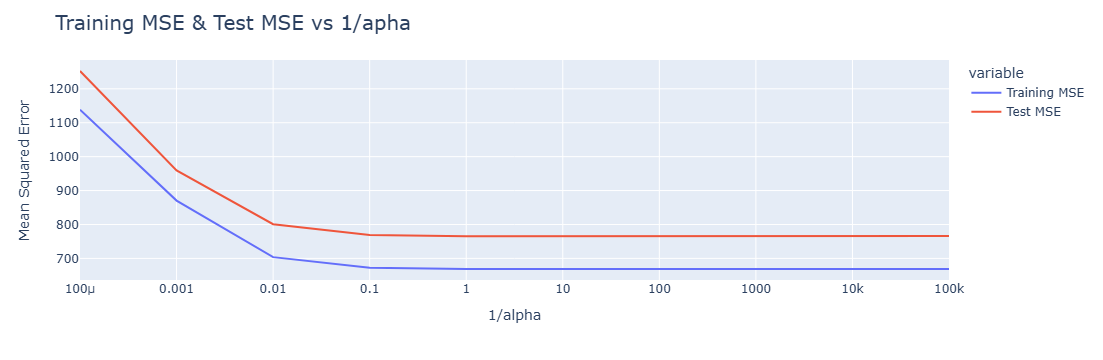

In [2374]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#results["1/alpha"] = 1.0/results["alpha"]

fig = px.line(results, x = "1/alpha", y = ["Training MSE", "Test MSE"], log_x = True)
#fig.write_image("MSE_vs_1_over_alpha_for_Ridge_reg_model.png", scale = 3)
fig.update_layout(yaxis_title="Mean Squared Error")
fig.update_layout(title=dict(text="Training MSE & Test MSE vs 1/apha", font=dict(size=20)))
fig.show()

In [2376]:
# choose 1/alpha = 0.1 or alpha = 10 for best-fit and avoid overfit
selected_alpha = 10.0
results = [get_training_and_dev_MSE_for_ridge_reg(alpha, X_train, y_train, X_test, y_test) for alpha in [selected_alpha]]
results = pd.DataFrame(results, columns=['alpha', 'Training MSE', 'Test MSE'])
display(results)
diff = results['Test MSE'] - results['Training MSE']
display(diff)


alpha  Training MSE    Test MSE
0   10.0    672.598969  768.838575

0    96.239606
dtype: float64

In [2378]:
diff = results['Test MSE'] - results['Training MSE']
display(diff)

#Note: MSE difference between train and test is 95.2 for alpha equal to 100. This implies a reasonably fitted model (not over-fitted) which is good.


0    96.239606
dtype: float64

In [2380]:
summary_results_2 = ['#2: Scaled-Ridge Regression', 'From Correlation Matrix', 'Yes',  results['Training MSE'][0], results['Test MSE'][0]]
display(summary_results_2)

['#2: Scaled-Ridge Regression',
 'From Correlation Matrix',
 'Yes',
 672.5989686536361,
 768.8385746260908]

### 

In [2383]:
# build the model for the chosen alpha and look at the model params
#
scaled_ridge_model = Pipeline([
                  ('scaler', StandardScaler()),
                 ('ridge_reg', Ridge(alpha = selected_alpha))])
scaled_ridge_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('ridge_reg', Ridge(alpha=10.0))])

In [2386]:

ridge_coefs = scaled_ridge_model.named_steps['ridge_reg'].coef_
#feature_names = scaled_ridge_model.named_steps['ridge_reg'].get_feature_names_out()
feature_names = X_train.columns

display(ridge_coefs)
display(X_train.columns)

ridge_df = pd.DataFrame({'feature': feature_names, 'coef': ridge_coefs[0]})
ridge_df
r = ridge_df.sort_values('coef', ascending=True)
display(r) 

array([[-6.48424606, -5.51424555,  1.26146714,  4.40163727,  6.26067208,
         0.56179401, -6.47795175,  2.41319774,  3.62120649,  2.05737886,
        -1.10476444,  3.22580432, -8.16983056,  2.35386007,  4.19248603]])

Index(['PopulationSize', 'PopulationChangeRate_2010_2020',
       'PopulationChangeRate_2020_2021', 'GDP_2021_thousands',
       'DAC_StatusYES_PctTracts', 'SVI_OverallRanking', 'SVI_Socioeconomic',
       'SVI_HouseholdCharacteristics', 'SVI_MinorityStatus',
       'PctAge65andOlder', 'PctUnderAge18', 'PctHispanic', 'MedianHHInc',
       'PovertyRate', 'UnemploymentRate'],
      dtype='object')

feature      coef
12                     MedianHHInc -8.169831
0                   PopulationSize -6.484246
6                SVI_Socioeconomic -6.477952
1   PopulationChangeRate_2010_2020 -5.514246
10                   PctUnderAge18 -1.104764
5               SVI_OverallRanking  0.561794
2   PopulationChangeRate_2020_2021  1.261467
9                 PctAge65andOlder  2.057379
13                     PovertyRate  2.353860
7     SVI_HouseholdCharacteristics  2.413198
11                     PctHispanic  3.225804
8               SVI_MinorityStatus  3.621206
14                UnemploymentRate  4.192486
3               GDP_2021_thousands  4.401637
4          DAC_StatusYES_PctTracts  6.260672

### Now build a Lasso Scaled Model to determine significant features


In [2389]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

y = data_clean[['NoInternet_PctTractsOver75thPctile']]
X = data_clean[select_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)

lasso_scaled_pipe = Pipeline([
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = randval))])
lasso_scaled_pipe.fit(X_train, y_train)
lasso_coefs = lasso_scaled_pipe.named_steps['lasso'].coef_
display(lasso_coefs)
lasso_scaled_pipe



array([-1.93469533, -4.84398743,  0.        ,  0.        ,  6.12754556,
        0.        , -2.75165873,  1.32804686,  2.4238331 ,  2.48550149,
       -0.31824981,  2.92355943, -8.35157482,  0.8304101 ,  3.45155324])

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=99))])

In [2391]:
lasso_train_mse = mean_squared_error(y_train, lasso_scaled_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_scaled_pipe.predict(X_test))
display(lasso_train_mse)
display(lasso_test_mse)

feature_names_lasso = lasso_scaled_pipe.named_steps['scaler'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names_lasso, 'coef': lasso_coefs})
lasso_df
r = lasso_df.sort_values('coef', ascending=False)
display(r) 

692.510149034014

766.2340941324866

feature      coef
4          DAC_StatusYES_PctTracts  6.127546
14                UnemploymentRate  3.451553
11                     PctHispanic  2.923559
9                 PctAge65andOlder  2.485501
8               SVI_MinorityStatus  2.423833
7     SVI_HouseholdCharacteristics  1.328047
13                     PovertyRate  0.830410
2   PopulationChangeRate_2020_2021  0.000000
3               GDP_2021_thousands  0.000000
5               SVI_OverallRanking  0.000000
10                   PctUnderAge18 -0.318250
0                   PopulationSize -1.934695
6                SVI_Socioeconomic -2.751659
1   PopulationChangeRate_2010_2020 -4.843987
12                     MedianHHInc -8.351575

In [2393]:
#result_df = lasso_df.loc[lasso_df['coef'] != 0]
result_df = lasso_df.query('coef != 0')
result_df.sort_values(by='coef', ascending=True, inplace=True)
# Hide the index when displaying
result_df2 = result_df.style.hide(axis="index")
display(result_df2)


In [2395]:
summary_results_3 = ['#3: Lasso-Scaled Regression', 'From Lasso Method', 'Yes',  lasso_train_mse, lasso_test_mse]
display(summary_results_3)

['#3: Lasso-Scaled Regression',
 'From Lasso Method',
 'Yes',
 692.510149034014,
 766.2340941324866]

### Significant features identified via Lasso Regression:

In [2398]:
result_df['feature'].values.tolist()

['MedianHHInc',
 'PopulationChangeRate_2010_2020',
 'SVI_Socioeconomic',
 'PopulationSize',
 'PctUnderAge18',
 'PovertyRate',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'PctAge65andOlder',
 'PctHispanic',
 'UnemploymentRate',
 'DAC_StatusYES_PctTracts']

In [2400]:
# select only columns identified important by the Lasso method and re-run Ridge Regression
#
lasso_select_cols = result_df['feature'].tolist()
#lasso_select_cols.append('NoInternet_PctTractsOver75thPctile')
display(lasso_select_cols)

y = data_clean[['NoInternet_PctTractsOver75thPctile']]
X = data_clean[lasso_select_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)
display(randval)

['MedianHHInc',
 'PopulationChangeRate_2010_2020',
 'SVI_Socioeconomic',
 'PopulationSize',
 'PctUnderAge18',
 'PovertyRate',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'PctAge65andOlder',
 'PctHispanic',
 'UnemploymentRate',
 'DAC_StatusYES_PctTracts']

99

In [2402]:
results = [get_training_and_dev_MSE_for_ridge_reg(alpha, X_train, y_train, X_test, y_test) for alpha in 10**np.linspace(-5, 4, 10)]
results = pd.DataFrame(results, columns=['alpha', 'Training MSE', 'Test MSE'])
results["1/alpha"] = 1.0/results["alpha"]
results['MSE diff'] = results['Test MSE'] - results['Training MSE']
r = results.sort_values('Test MSE')
r = results
display(r)
print('Min Test MSE:')
display(results.sort_values('Test MSE').iloc[0,:])

alpha  Training MSE     Test MSE      1/alpha    MSE diff
0      0.00001    679.654359   794.070971  100000.0000  114.416611
1      0.00010    679.654359   794.070909   10000.0000  114.416549
2      0.00100    679.654360   794.070288    1000.0000  114.415929
3      0.01000    679.654361   794.064085     100.0000  114.409724
4      0.10000    679.654520   794.002377      10.0000  114.347857
5      1.00000    679.669719   793.416344       1.0000  113.746625
6     10.00000    680.706282   789.666029       0.1000  108.959747
7    100.00000    702.711080   793.114773       0.0100   90.403693
8   1000.00000    878.396833   963.891974       0.0010   85.495141
9  10000.00000   1144.320560  1259.341508       0.0001  115.020948

Min Test MSE:


alpha            10.000000
Training MSE    680.706282
Test MSE        789.666029
1/alpha           0.100000
MSE diff        108.959747
Name: 6, dtype: float64

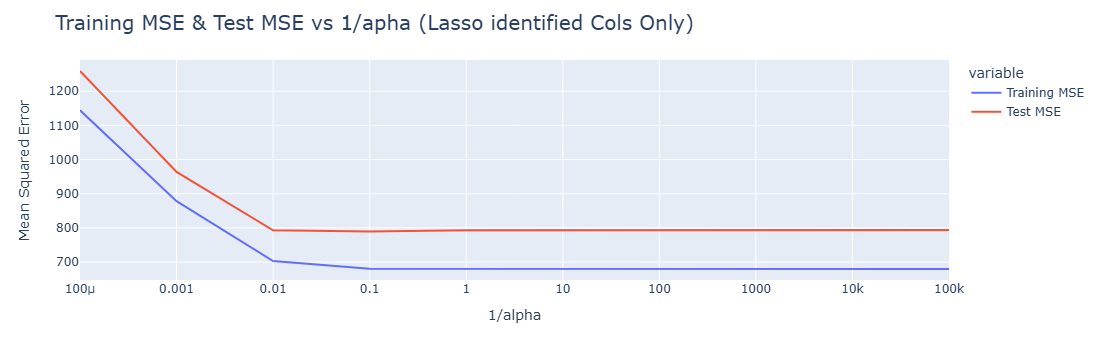

In [2404]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#results["1/alpha"] = 1.0/results["alpha"]

fig = px.line(results, x = "1/alpha", y = ["Training MSE", "Test MSE"], log_x = True)
#fig.write_image("MSE_vs_1_over_alpha_for_Ridge_reg_model.png", scale = 3)
fig.update_layout(yaxis_title="Mean Squared Error")
fig.update_layout(title=dict(text="Training MSE & Test MSE vs 1/apha (Lasso identified Cols Only)", font=dict(size=20)))
fig.show()

In [2406]:
# choose 1/alpha = 0.1 or alpha = 10 for best-fit and avoid overfit
selected_alpha = 10.0
results2 = [get_training_and_dev_MSE_for_ridge_reg(alpha2, X_train, y_train, X_test, y_test) for alpha2 in [selected_alpha]]
results2 = pd.DataFrame(results2, columns=['alpha', 'Training MSE', 'Test MSE'])
display(results2)
diff2 = results2['Test MSE'] - results2['Training MSE']
display(diff2)

alpha  Training MSE    Test MSE
0   10.0    680.706282  789.666029

0    108.959747
dtype: float64

In [2408]:
summary_results_4 = ['#4: Scaled-Ridge Model (with Lasso features)', 'Selected from Lasso Method', 'Yes',  results2['Training MSE'][0], results2['Test MSE'][0]]
display(summary_results_4)

['#4: Scaled-Ridge Model (with Lasso features)',
 'Selected from Lasso Method',
 'Yes',
 680.7062820661979,
 789.6660285941527]

In [2410]:
display(lasso_select_cols)

['MedianHHInc',
 'PopulationChangeRate_2010_2020',
 'SVI_Socioeconomic',
 'PopulationSize',
 'PctUnderAge18',
 'PovertyRate',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'PctAge65andOlder',
 'PctHispanic',
 'UnemploymentRate',
 'DAC_StatusYES_PctTracts']

In [2412]:
### Now try lasso with larger column set

In [2414]:
large_col_set = \
['PopulationSize',
 'PopulationChangeRate_2010_2020',
 'PopulationChangeRate_2020_2021',
 'GDP_2021_thousands',
 'DAC_StatusYES_PctTracts',
 'SVI_OverallRanking',
 'SVI_Socioeconomic',
 'SVI_HouseholdCharacteristics',
 'SVI_MinorityStatus',
 'PctAge65andOlder',
 'PctUnderAge18',
 'PctHispanic',
 'MedianHHInc',
 'PovertyRate',
 'UnemploymentRate',
 'NoInternet_PctTractsOver75thPctile',
 'ElectricalPowerTransmissionLine_km',
 'ElectricalPowerTransmissionLine_miles',
 'CrudeOilPipeline_km',
 'CrudeOilPipeline_miles',
 'PetroleumPipeline_km',
 'PetroleumPipeline_miles',
 'NaturalGasPipeline_km',
 'NaturalGasPipeline_miles',
 'CO2Pipelines_km',
 'CO2Pipelines_miles',
 'UtilityPV_TechPotential',
 'ResidentialPV_TechPotential',
 'CommercialPV_TechPotential',
 'LandbasedWind_TechPotential',
 'DistributedWind_TechPotential',
 'GeothermalHeatPump_EconPotential']


In [2417]:
y = data_clean[['NoInternet_PctTractsOver75thPctile']]
X = data_clean[large_col_set]
X = X.drop('NoInternet_PctTractsOver75thPctile', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)

lasso_scaled_pipe = Pipeline([
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = randval))])
lasso_scaled_pipe.fit(X_train, y_train)
lasso_coefs = lasso_scaled_pipe.named_steps['lasso'].coef_
display(lasso_coefs)
lasso_scaled_pipe


lasso_train_mse = mean_squared_error(y_train, lasso_scaled_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_scaled_pipe.predict(X_test))
display(lasso_train_mse)
display(lasso_test_mse)

feature_names_lasso = lasso_scaled_pipe.named_steps['scaler'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names_lasso, 'coef': lasso_coefs})
lasso_df
r = lasso_df.sort_values('coef', ascending=False)
display(r) 


array([-0.        , -4.44238608,  0.        ,  0.        ,  6.23894605,
        0.        , -2.71747724,  1.11189734,  2.82802623,  3.58819769,
       -0.        ,  2.67259839, -8.45912906,  1.23507584,  2.60080625,
       -1.76736885, -0.        ,  2.67534032,  0.        ,  0.23127962,
        0.        ,  1.37166756,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -1.51933878])

668.6237770205553

732.1945077970896

feature      coef
4                 DAC_StatusYES_PctTracts  6.238946
9                        PctAge65andOlder  3.588198
8                      SVI_MinorityStatus  2.828026
17                    CrudeOilPipeline_km  2.675340
11                            PctHispanic  2.672598
14                       UnemploymentRate  2.600806
21                  NaturalGasPipeline_km  1.371668
13                            PovertyRate  1.235076
7            SVI_HouseholdCharacteristics  1.111897
19                   PetroleumPipeline_km  0.231280
16  ElectricalPowerTransmissionLine_miles -0.000000
24                     CO2Pipelines_miles -0.000000
23                        CO2Pipelines_km -0.000000
22               NaturalGasPipeline_miles  0.000000
20                PetroleumPipeline_miles  0.000000
18                 CrudeOilPipeline_miles  0.000000
0                          PopulationSize -0.000000
27             CommercialPV_TechPotential -0.000000
26            ResidentialPV_TechPotential -0.000000
28            LandbasedWind_TechPotential -0.000000
10                          PctUnderAge18 -0.000000
29          DistributedWind_TechPotential  0.000000
5                      SVI_OverallRanking  0.000000
3                      GDP_2021_thousands  0.000000
2          PopulationChangeRate_2020_2021  0.000000
25                UtilityPV_TechPotential  0.000000
30       GeothermalHeatPump_EconPotential -1.519339
15     ElectricalPowerTransmissionLine_km -1.767369
6                       SVI_Socioeconomic -2.717477
1          PopulationChangeRate_2010_2020 -4.442386
12                            MedianHHInc -8.459129

In [2419]:
result_df = lasso_df.query('coef != 0')
result_df.sort_values(by='coef', ascending=True, inplace=True)
# Hide the index when displaying
result_df2 = result_df.style.hide(axis="index")
display(result_df2)


In [2421]:
# build model using columns from lasso reg.

99

alpha  Training MSE     Test MSE      1/alpha    MSE diff
0      0.00001    651.112135   750.555346  100000.0000   99.443212
1      0.00010    651.112135   750.555318   10000.0000   99.443184
2      0.00100    651.112135   750.555041    1000.0000   99.442906
3      0.01000    651.112136   750.552265     100.0000   99.440129
4      0.10000    651.112296   750.524610      10.0000   99.412314
5      1.00000    651.127674   750.257757       1.0000   99.130083
6     10.00000    652.229335   748.407397       0.1000   96.178061
7    100.00000    679.327907   760.370815       0.0100   81.042908
8   1000.00000    872.934705   951.360941       0.0010   78.426236
9  10000.00000   1143.922452  1256.969078       0.0001  113.046626

Min Test MSE:


alpha            10.000000
Training MSE    652.229335
Test MSE        748.407397
1/alpha           0.100000
MSE diff         96.178061
Name: 6, dtype: float64

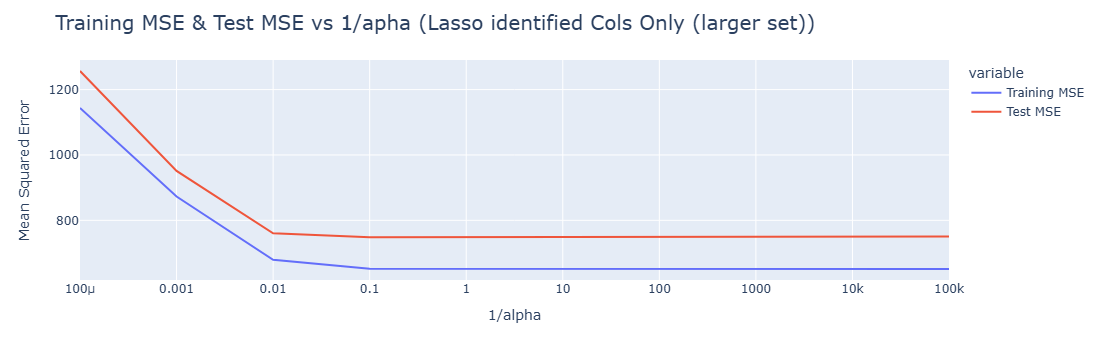

In [2423]:
# select only columns identified important by the Lasso method and re-run Ridge Regression
#
lasso_select_cols_v2 = result_df['feature'].tolist()
y = data_clean[['NoInternet_PctTractsOver75thPctile']]
X = data_clean[lasso_select_cols_v2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randval)
display(randval)

results = [get_training_and_dev_MSE_for_ridge_reg(alpha, X_train, y_train, X_test, y_test) for alpha in 10**np.linspace(-5, 4, 10)]
results = pd.DataFrame(results, columns=['alpha', 'Training MSE', 'Test MSE'])
results["1/alpha"] = 1.0/results["alpha"]
results['MSE diff'] = results['Test MSE'] - results['Training MSE']
r = results.sort_values('Test MSE')
r = results
display(r)
print('Min Test MSE:')
display(results.sort_values('Test MSE').iloc[0,:])

fig = px.line(results, x = "1/alpha", y = ["Training MSE", "Test MSE"], log_x = True)
#fig.write_image("MSE_vs_1_over_alpha_for_Ridge_reg_model.png", scale = 3)
fig.update_layout(yaxis_title="Mean Squared Error")
fig.update_layout(title=dict(text="Training MSE & Test MSE vs 1/apha (Lasso identified Cols Only (larger set))", font=dict(size=20)))
fig.show()


In [2425]:
# choose 1/alpha = 0.1 or alpha = 10 for best-fit and avoid overfit
selected_alpha = 10.0
results = [get_training_and_dev_MSE_for_ridge_reg(alpha2, X_train, y_train, X_test, y_test) for alpha2 in [selected_alpha]]
results = pd.DataFrame(results, columns=['alpha', 'Training MSE', 'Test MSE'])
display(results)
diff = results['Test MSE'] - results['Training MSE']
display(diff)

alpha  Training MSE    Test MSE
0   10.0    652.229335  748.407397

0    96.178061
dtype: float64

In [2427]:
display((results))

summary_results_5 = ['#5: Scaled-Ridge Model (with Lasso features)-v2', 'Selected from Lasso Method (larger set)', 'Yes',  results['Training MSE'][0], results['Test MSE'][0]]
display(summary_results_5)

alpha  Training MSE    Test MSE
0   10.0    652.229335  748.407397

['#5: Scaled-Ridge Model (with Lasso features)-v2',
 'Selected from Lasso Method (larger set)',
 'Yes',
 652.2293353299755,
 748.407396614059]

In [2429]:
results = pd.DataFrame(results, columns=['alpha', 'Training MSE', 'Test MSE'])
results["1/alpha"] = 1.0/results["alpha"]
results['MSE diff'] = results['Test MSE'] - results['Training MSE']


In [2431]:

summary_results_table.clear()
summary_results_table.append(summary_results_1)
summary_results_table.append(summary_results_2)
summary_results_table.append(summary_results_3)
summary_results_table.append(summary_results_4)
summary_results_table.append(summary_results_5)
model_summary_df = pd.DataFrame(summary_results_table, columns=['Model_Type', 'Feature_Selection', 'Data_Scaled', 'TrainMSE', 'TestMSE'])
display(model_summary_df)

Model_Type  \
0                            #1: Linear Regression   
1                      #2: Scaled-Ridge Regression   
2                      #3: Lasso-Scaled Regression   
3     #4: Scaled-Ridge Model (with Lasso features)   
4  #5: Scaled-Ridge Model (with Lasso features)-v2   

                         Feature_Selection Data_Scaled    TrainMSE     TestMSE  
0                  From Correlation Matrix          No  674.464820  747.042053  
1                  From Correlation Matrix         Yes  672.598969  768.838575  
2                        From Lasso Method         Yes  692.510149  766.234094  
3               Selected from Lasso Method         Yes  680.706282  789.666029  
4  Selected from Lasso Method (larger set)         Yes  652.229335  748.407397

In [ ]:
#
# Note:
# Best model is #1 or #5 (both have TestMSE close to 750.
# choose model #5 which scales the data before apply linear regression.
#

In [ ]:
### END OF NOTEBOOK